In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as skm
from sklearn.pipeline import Pipeline
from collections import Counter

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Data Processing

In [2]:
master_df = pd.read_csv('../Feature Extraction/master_df.csv', index_col=0)
master_df.head()

,File Path,y
0,MP18-17\Slabs\1.png,0
0,MP18-17\Slabs\2.png,0
0,MP18-17\Slabs\3.png,0
0,MP18-17\Slabs\4.png,0
0,MP18-17\Slabs\5.png,0


In [3]:
y_df = master_df.iloc[:,-1]
y_df.describe()

count    1027.000000
mean        0.199611
std         0.399902
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: y, dtype: float64

In [4]:
length_df = pd.read_csv('../Feature Extraction/length_df.csv', index_col=0)
length_df.describe()

,Length,y
count,1027.000000,1027.000000
mean,5163.430380,0.199611
std,1603.432568,0.399902
min,1328.000000,0.000000
25%,4064.500000,0.000000
50%,5160.000000,0.000000
75%,6718.000000,0.000000
max,12484.000000,1.000000


In [5]:
lbp_def = pd.read_csv('../Feature Extraction/lbp_def_df.csv', index_col=0)
lbp_def.describe()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1.027000e+03,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1.027000e+03,1027.000000
mean,35179.217137,56313.979552,6.702045,19414.648491,81626.455696,7080.111977,31781.387537,5.170576e+05,6.865628,23.103213,...,86341.204479,335306.798442,131928.042843,3.203505,38325.776047,110332.649464,86396.500487,24084.386563,5.575901e+05,0.199611
std,12035.545350,18988.880987,4.183746,7060.203324,24868.480564,2308.760385,11606.753526,1.635804e+05,4.361968,12.468794,...,39539.419825,108402.053316,37639.353414,2.586226,11594.444984,35305.242373,39562.698672,9222.190786,2.521653e+05,0.399902
min,6632.000000,13168.000000,0.000000,2928.000000,13630.000000,1739.000000,2849.000000,1.469090e+05,0.000000,0.000000,...,21172.000000,63637.000000,32879.000000,0.000000,2853.000000,33537.000000,21165.000000,3710.000000,1.531000e+05,0.000000
25%,27367.500000,42630.000000,4.000000,15069.000000,69236.000000,5804.500000,24655.500000,4.055810e+05,4.000000,15.000000,...,67419.000000,267259.000000,113268.000000,1.000000,34862.500000,84078.500000,67395.000000,17185.000000,4.467280e+05,0.000000
50%,36058.000000,55504.000000,6.000000,20087.000000,83415.000000,7138.000000,32764.000000,5.092700e+05,7.000000,23.000000,...,82897.000000,340901.000000,135271.000000,3.000000,41146.000000,107240.000000,83034.000000,23969.000000,5.394000e+05,0.000000
75%,45656.000000,74648.500000,9.000000,25375.500000,103059.500000,9013.500000,41603.500000,6.764675e+05,10.000000,31.000000,...,102739.000000,434119.500000,163103.500000,5.000000,46313.000000,144241.500000,103167.000000,32578.000000,6.707790e+05,0.000000
max,88914.000000,129680.000000,24.000000,50290.000000,203957.000000,17549.000000,77955.000000,1.323731e+06,23.000000,73.000000,...,758762.000000,785651.000000,326504.000000,16.000000,105549.000000,252614.000000,755387.000000,52872.000000,4.956881e+06,1.000000


In [ ]:
lbp_def_10 = pd.read_csv('../Feature Extraction/lbp_def_df.csv', index_col=0)
lbp_def_10.describe()

In [6]:
lbp_ror = pd.read_csv('../Feature Extraction/lbp_ror_df.csv', index_col=0)
lbp_ror.describe()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
count,1027.000000,1027.000000,1027.0,1027.000000,1027.0,1027.000000,1027.0,1.027000e+03,1027.0,1027.000000,...,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1.027000e+03,1027.000000
mean,35179.217137,275364.333982,0.0,205043.907498,0.0,28067.662123,0.0,2.415388e+06,0.0,191.389484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.575901e+05,0.199611
std,12035.545350,86371.006798,0.0,74447.233675,0.0,9131.994861,0.0,7.636403e+05,0.0,97.005547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.521653e+05,0.399902
min,6632.000000,70026.000000,0.0,29858.000000,0.0,6690.000000,0.0,6.509370e+05,0.0,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.531000e+05,0.000000
25%,27367.500000,222304.000000,0.0,158092.500000,0.0,23092.000000,0.0,1.876106e+06,0.0,138.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.467280e+05,0.000000
50%,36058.000000,276581.000000,0.0,212020.000000,0.0,28265.000000,0.0,2.387391e+06,0.0,192.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.394000e+05,0.000000
75%,45656.000000,354406.500000,0.0,268164.000000,0.0,35671.500000,0.0,3.159715e+06,0.0,249.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.707790e+05,0.000000
max,88914.000000,668619.000000,0.0,519160.000000,0.0,70360.000000,0.0,5.803344e+06,0.0,609.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.956881e+06,1.000000


In [ ]:
lbp_ror_10 = pd.read_csv('../Feature Extraction/lbp_ror_10_df.csv', index_col=0)
lbp_ror_10.describe()

In [7]:
lbp_uni = pd.read_csv('../Feature Extraction/lbp_uni_df.csv', index_col=0)
lbp_uni.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1027.000000,1027.000000,1027.000000,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1027.000000,1027.000000
mean,35179.217137,275364.333982,205043.907498,2.415388e+06,8.003626e+06,5.455056e+06,9.785261e+05,4.740210e+05,5.575901e+05,353938.877313,0.199611
std,12035.545350,86371.006798,74447.233675,7.636403e+05,2.642922e+06,1.649088e+06,2.933989e+05,1.747667e+05,2.521653e+05,109333.587172,0.399902
min,6632.000000,70026.000000,29858.000000,6.509370e+05,1.606517e+06,1.591135e+06,2.790710e+05,1.337080e+05,1.531000e+05,94492.000000,0.000000
25%,27367.500000,222304.000000,158092.500000,1.876106e+06,6.384374e+06,4.443642e+06,7.927390e+05,3.887765e+05,4.467280e+05,292856.000000,0.000000
50%,36058.000000,276581.000000,212020.000000,2.387391e+06,8.110399e+06,5.407831e+06,9.807670e+05,4.647320e+05,5.394000e+05,352851.000000,0.000000
75%,45656.000000,354406.500000,268164.000000,3.159715e+06,1.043348e+07,7.005356e+06,1.248109e+06,5.755290e+05,6.707790e+05,453282.000000,0.000000
max,88914.000000,668619.000000,519160.000000,5.803344e+06,1.924421e+07,1.273070e+07,2.246497e+06,3.130484e+06,4.956881e+06,799865.000000,1.000000


In [ ]:
lbp_uni_10 = pd.read_csv('../Feature Extraction/lbp_uni_10_df.csv', index_col=0)
lbp_uni_10.describe()

In [8]:
lbp_nri = pd.read_csv('../Feature Extraction/lbp_nri_df.csv', index_col=0)
lbp_nri.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1.027000e+03,1027.000000,1027.000000
mean,35179.217137,56313.979552,7.072055,80966.351509,6.623174,56430.284323,6.865628,81626.455696,6.702045,19414.648491,...,39040.648491,87657.619279,24076.791626,86341.204479,38325.776047,86396.500487,24084.386563,5.575901e+05,353938.877313,0.199611
std,12035.545350,18988.880987,4.418933,24581.348648,4.099775,19075.596951,4.361968,24868.480564,4.183746,7060.203324,...,11872.745045,40065.904814,9203.676443,39539.419825,11594.444984,39562.698672,9222.190786,2.521653e+05,109333.587172,0.399902
min,6632.000000,13168.000000,0.000000,13631.000000,0.000000,13311.000000,0.000000,13630.000000,0.000000,2928.000000,...,2685.000000,20825.000000,3639.000000,21172.000000,2853.000000,21165.000000,3710.000000,1.531000e+05,94492.000000,0.000000
25%,27367.500000,42630.000000,4.000000,69405.500000,4.000000,42624.000000,4.000000,69236.000000,4.000000,15069.000000,...,35511.000000,68353.000000,17181.000000,67419.000000,34862.500000,67395.000000,17185.000000,4.467280e+05,292856.000000,0.000000
50%,36058.000000,55504.000000,7.000000,82656.000000,6.000000,55686.000000,7.000000,83415.000000,6.000000,20087.000000,...,42120.000000,84130.000000,23797.000000,82897.000000,41146.000000,83034.000000,23969.000000,5.394000e+05,352851.000000,0.000000
75%,45656.000000,74648.500000,10.000000,101916.000000,9.000000,74683.000000,10.000000,103059.500000,9.000000,25375.500000,...,47358.000000,105021.500000,32630.000000,102739.000000,46313.000000,103167.000000,32578.000000,6.707790e+05,453282.000000,0.000000
max,88914.000000,129680.000000,23.000000,205264.000000,24.000000,129640.000000,23.000000,203957.000000,24.000000,50290.000000,...,105106.000000,766652.000000,53218.000000,758762.000000,105549.000000,755387.000000,52872.000000,4.956881e+06,799865.000000,1.000000


In [ ]:
lbp_nri_10 = pd.read_csv('../Feature Extraction/lbp_nri_10_df.csv', index_col=0)
lbp_nri_10.describe()

In [9]:
color_256 = pd.read_csv('../Feature Extraction/color_256.csv', index_col=0)
color_256.describe()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,y,256
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.00000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,0.0,1027.000000
mean,0.029211,0.467381,1.648491,3.406037,6.475170,12.430380,22.247322,39.013632,63.922103,98.550146,...,0.14703,0.118793,0.118793,0.076923,0.043817,0.038948,0.019474,0.000974,NaN,0.199611
std,0.529006,4.162589,10.069065,18.787663,34.094098,64.646767,114.817854,195.054478,310.812944,455.738402,...,3.37558,2.687330,2.960017,2.158650,1.197393,1.127558,0.624086,0.031204,NaN,0.399902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,9.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,7.000000,13.000000,21.000000,38.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,15.000000,97.000000,171.000000,268.000000,514.000000,968.000000,1722.000000,3062.000000,4495.000000,6788.000000,...,106.00000,84.000000,94.000000,69.000000,38.000000,36.000000,20.000000,1.000000,NaN,1.000000


In [10]:
smoothed_256 = pd.read_csv('../Feature Extraction/smoothed_256.csv', index_col=0)
smoothed_256.describe()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,y,256
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.0,0.0,1027.000000
mean,0.004869,0.077897,0.435248,1.555988,4.103213,9.808179,19.997079,37.832522,64.057449,97.983447,...,0.129503,0.103213,0.079844,0.041870,0.029211,0.012658,0.002921,0.0,NaN,0.199611
std,0.156022,1.152913,3.936440,10.484349,24.434841,58.256585,115.714961,210.556103,343.611410,491.945332,...,3.281435,2.737199,2.345302,1.195834,0.847611,0.375720,0.093613,0.0,NaN,0.399902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000,14.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000
max,5.000000,25.000000,77.000000,184.000000,357.000000,867.000000,1765.000000,3287.000000,5013.000000,7565.000000,...,104.000000,87.000000,75.000000,38.000000,27.000000,12.000000,3.000000,0.0,NaN,1.000000


In [11]:
length_df = length_df.iloc[:,:-1]

lbp_def = lbp_def.iloc[:,:-1]
lbp_ror = lbp_ror.iloc[:,:-1]
lbp_uni = lbp_uni.iloc[:,:-1]
lbp_nri = lbp_nri.iloc[:,:-1]

lbp_def_10 = lbp_def_10.iloc[:,:-1]
lbp_ror_10 = lbp_ror_10.iloc[:,:-1]
lbp_uni_10 = lbp_uni_10.iloc[:,:-1]
lbp_nri_10 = lbp_nri_10.iloc[:,:-1]

color_256 = color_256.iloc[:,:-2]
smoothed_256 = smoothed_256.iloc[:,:-2]

In [12]:
color_128 = pd.read_csv('../Feature Extraction/color_128.csv', index_col=0)
color_128.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,0.496592,5.054528,18.905550,61.260954,162.472249,318.123661,588.714703,1293.975657,3013.788705,5457.049659,...,3.089581,2.089581,1.176241,0.694255,0.479065,0.356378,0.265823,0.195716,0.082765,0.020448
std,4.640774,28.689454,98.476097,309.488470,764.215663,1177.772279,1583.179688,3537.295653,8334.402337,12583.899528,...,52.316604,34.459256,17.414204,10.587333,7.912798,6.881592,6.058232,5.114447,2.324118,0.655291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,26.000000,66.500000,151.500000,313.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,4.000000,14.000000,38.000000,91.000000,208.000000,397.000000,732.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,5.000000,20.000000,60.000000,160.000000,387.000000,831.000000,1787.500000,3484.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,112.000000,432.000000,1451.000000,4784.000000,11283.000000,19611.000000,20923.000000,39638.000000,83250.000000,106898.000000,...,1619.000000,1029.000000,440.000000,267.000000,221.000000,209.000000,190.000000,163.000000,74.000000,21.000000


In [13]:
smoothed_128 = pd.read_csv('../Feature Extraction/smoothed_128.csv', index_col=0)
smoothed_128.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,0.082765,1.991237,13.911392,57.829601,162.040896,300.893866,543.091529,1295.215190,3128.346641,5532.009737,...,2.912366,1.890944,1.063291,0.579357,0.457644,0.297955,0.232717,0.121714,0.041870,0.002921
std,1.263510,14.269712,82.415205,325.764399,833.420799,1213.618769,1562.665440,3952.667394,9223.674207,13127.975525,...,55.428335,33.681193,16.207923,9.614108,8.436953,6.546343,6.017468,3.536745,1.223232,0.093613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,48.000000,111.000000,245.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,6.000000,25.000000,71.000000,170.000000,338.000000,628.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,9.500000,41.000000,117.000000,320.000000,691.500000,1551.500000,3168.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,261.000000,1220.000000,5052.000000,12578.000000,20808.000000,20587.000000,46714.000000,92947.000000,108462.000000,...,1725.000000,1002.000000,406.000000,259.000000,248.000000,204.000000,191.000000,113.000000,39.000000,3.000000


In [14]:
color_64 = pd.read_csv('../Feature Extraction/color_64.csv', index_col=0)
color_64.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1027.000000,1027.000000,1027.00000,1027.00000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,5.551120,80.166504,480.59591,1882.69036,8470.838364,18427.638754,29015.751704,47180.754625,78749.052580,128187.655307,...,292.031159,160.863681,76.638754,32.591042,12.482960,5.179163,1.870497,0.835443,0.461538,0.103213
std,32.864096,406.961764,1926.30224,4910.54463,20532.227599,33009.093274,40754.589202,48467.831946,61363.499033,84243.912091,...,1336.954980,747.527380,491.325112,396.634839,189.866919,86.581430,27.419735,14.681916,11.155608,2.976035
min,0.000000,0.000000,0.00000,0.00000,5.000000,43.000000,195.000000,340.000000,485.000000,1152.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,11.00000,93.50000,475.500000,1900.500000,6664.000000,17356.000000,36936.000000,69194.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,52.00000,316.00000,1113.000000,4184.000000,12901.000000,30742.000000,60760.000000,107739.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,26.000000,218.00000,1215.50000,5262.500000,18092.000000,37690.000000,61339.000000,105534.500000,165331.500000,...,56.000000,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,544.000000,6235.000000,30894.00000,52230.00000,190148.000000,273336.000000,400814.000000,510926.000000,661604.000000,769128.000000,...,28888.000000,12579.000000,12647.000000,12243.000000,5904.000000,2648.000000,604.000000,430.000000,353.000000,95.000000


In [15]:
smoothed_64 = pd.read_csv('../Feature Extraction/smoothed_64.csv', index_col=0)
smoothed_64.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,2.074002,71.740993,462.934761,1838.306719,8660.356378,17956.343720,27556.651412,44813.090555,75234.596884,123549.702045,...,284.506329,154.567673,70.824732,30.314508,11.471276,4.803311,1.642648,0.755599,0.354430,0.044791
std,15.297708,407.087898,2028.209969,5263.213335,21804.343335,33429.042248,40769.502666,48232.316595,60699.524823,83740.183482,...,1359.204543,760.838368,480.013191,417.531555,192.664400,88.806436,25.063853,14.884273,9.546285,1.316391
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,112.000000,280.000000,361.000000,959.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,62.500000,367.000000,1521.000000,5753.500000,15728.000000,34441.000000,65074.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,253.000000,959.000000,3677.000000,11446.000000,28345.000000,57406.000000,102601.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,10.000000,166.500000,1027.500000,4760.000000,16722.500000,35096.000000,57407.000000,101618.000000,158841.500000,...,44.500000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,291.000000,6272.000000,33386.000000,59538.000000,201409.000000,285957.000000,411732.000000,522574.000000,669016.000000,770667.000000,...,29675.000000,13427.000000,12369.000000,12995.000000,6021.000000,2727.000000,534.000000,452.000000,304.000000,42.000000


In [16]:
color_32 = pd.read_csv('../Feature Extraction/color_32.csv', index_col=0)
color_32.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1027.000000,1027.000000,1027.000000,1027.000000,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.00000,1027.000000,1027.000000,1027.000000,1027.00000,1027.000000
mean,85.717624,2363.286271,26898.477118,76196.506329,2.069367e+05,4.953164e+05,9.677283e+05,1.538205e+06,2.062359e+06,2.434663e+06,...,8709.710808,7581.324245,5539.993184,2526.349562,1155.06816,452.894839,109.229796,17.662123,2.70594,0.564752
std,437.010822,6231.946272,50526.243842,87553.505381,1.438774e+05,2.794193e+05,4.580393e+05,6.230201e+05,7.650450e+05,8.603416e+05,...,24718.229156,22532.797758,15635.935996,6956.343010,4020.53312,2042.309001,867.975066,275.672192,40.50268,14.118216
min,0.000000,0.000000,48.000000,588.000000,1.637000e+03,6.983000e+03,1.312100e+04,5.889800e+04,2.433420e+05,5.715710e+05,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,107.000000,2454.500000,24114.000000,1.076445e+05,2.971115e+05,6.499220e+05,1.113164e+06,1.521854e+06,1.801702e+06,...,521.000000,142.000000,22.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,4.000000,386.000000,5426.000000,44807.000000,1.690610e+05,4.470320e+05,8.997850e+05,1.480814e+06,2.001866e+06,2.449377e+06,...,2011.000000,1377.000000,628.000000,133.000000,9.00000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,26.000000,1515.000000,23641.500000,101343.500000,2.736280e+05,6.294910e+05,1.212392e+06,1.920038e+06,2.554164e+06,3.028365e+06,...,5850.000000,5014.000000,3333.000000,1745.500000,555.50000,77.500000,2.000000,0.000000,0.00000,0.000000
max,6626.000000,70454.000000,399817.000000,858684.000000,1.430732e+06,2.518749e+06,3.282682e+06,4.350129e+06,6.433093e+06,8.155840e+06,...,260318.000000,237376.000000,179231.000000,85234.000000,55499.00000,41467.000000,24890.000000,8552.000000,989.00000,448.000000


In [17]:
smoothed_32 = pd.read_csv('../Feature Extraction/smoothed_32.csv', index_col=0)
smoothed_32.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1027.000000,1027.000000,1027.000000,1027.000000,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,73.814995,2301.241480,26616.700097,72369.741967,1.987843e+05,4.850664e+05,9.629466e+05,1.545918e+06,2.084886e+06,2.468031e+06,...,8585.923077,7486.987342,5471.191821,2468.148978,1130.792600,439.074002,101.139241,16.274586,2.398247,0.399221
std,420.301561,6520.074233,51577.332929,87294.417041,1.425998e+05,2.817535e+05,4.652235e+05,6.332222e+05,7.781580e+05,8.751121e+05,...,24892.177580,22720.703975,15818.235907,7000.471367,4061.213314,2077.432661,873.991887,280.741698,38.159894,10.858936
min,0.000000,0.000000,14.000000,557.000000,1.320000e+03,6.479000e+03,1.110300e+04,5.027700e+04,2.320450e+05,5.685800e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,72.000000,1973.500000,21853.500000,1.005215e+05,2.862240e+05,6.382845e+05,1.116914e+06,1.536806e+06,1.830131e+06,...,402.500000,103.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,292.000000,4756.000000,41173.000000,1.610120e+05,4.343330e+05,8.976120e+05,1.484794e+06,2.023313e+06,2.481142e+06,...,1958.000000,1294.000000,574.000000,90.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,1305.000000,21499.500000,94631.000000,2.649165e+05,6.206355e+05,1.211774e+06,1.928678e+06,2.587526e+06,3.063696e+06,...,5732.000000,4875.500000,3185.000000,1579.500000,493.500000,53.500000,0.000000,0.000000,0.000000,0.000000
max,6463.000000,71852.000000,406066.000000,880692.000000,1.439683e+06,2.555225e+06,3.340673e+06,4.426396e+06,6.494759e+06,8.193880e+06,...,262619.000000,240495.000000,181220.000000,86656.000000,54847.000000,43102.000000,25364.000000,8748.000000,983.000000,346.000000


In [22]:
lbp_def = lbp_def.div(lbp_def.sum(axis=1), axis=0).fillna(0)
lbp_ror = lbp_ror.div(lbp_ror.sum(axis=1), axis=0).fillna(0)
lbp_uni = lbp_uni.div(lbp_uni.sum(axis=1), axis=0).fillna(0)
lbp_nri = lbp_nri.div(lbp_nri.sum(axis=1), axis=0).fillna(0)

lbp_def_10 = lbp_def_10.div(lbp_def_10.sum(axis=1), axis=0).fillna(0)
lbp_ror_10 = lbp_ror_10.div(lbp_ror_10.sum(axis=1), axis=0).fillna(0)
lbp_uni_10 = lbp_uni_10.div(lbp_uni_10.sum(axis=1), axis=0).fillna(0)
lbp_nri_10 = lbp_nri_10.div(lbp_nri_10.sum(axis=1), axis=0).fillna(0)

color_256 = color_256.div(color_256.sum(axis=1), axis=0).fillna(0)
smoothed_256 = smoothed_256.div(smoothed_256.sum(axis=1), axis=0).fillna(0)
color_128 = color_128.div(color_128.sum(axis=1), axis=0).fillna(0)
smoothed_128 = smoothed_128.div(smoothed_128.sum(axis=1), axis=0).fillna(0)
color_64 = color_64.div(color_64.sum(axis=1), axis=0).fillna(0)
smoothed_64 = smoothed_64.div(smoothed_64.sum(axis=1), axis=0).fillna(0)
color_32 = color_32.div(color_32.sum(axis=1), axis=0).fillna(0)
smoothed_32 = smoothed_32.div(smoothed_32.sum(axis=1), axis=0).fillna(0)

In [23]:
# train/test splits

master_train, master_test, y_train, y_test = train_test_split(master_df, y_df, test_size=0.25, random_state=42)

length_train, length_test, _, _ = train_test_split(length_df, y_df, test_size=0.25, random_state=42)

lbp_def_train, lbp_def_test, _, _ = train_test_split(lbp_def, y_df, test_size=0.25, random_state=42)
lbp_ror_train, lbp_ror_test, _, _ = train_test_split(lbp_ror, y_df, test_size=0.25, random_state=42)
lbp_uni_train, lbp_uni_test, _, _ = train_test_split(lbp_uni, y_df, test_size=0.25, random_state=42)
lbp_nri_train, lbp_nri_test, _, _ = train_test_split(lbp_nri, y_df, test_size=0.25, random_state=42)

lbp_def_10_train, lbp_def_10_test, _, _ = train_test_split(lbp_def_10, y_df, test_size=0.25, random_state=42)
lbp_ror_10_train, lbp_ror_10_test, _, _ = train_test_split(lbp_ror_10, y_df, test_size=0.25, random_state=42)
lbp_uni_10_train, lbp_uni_10_test, _, _ = train_test_split(lbp_uni_10, y_df, test_size=0.25, random_state=42)
lbp_nri_10_train, lbp_nri_10_test, _, _ = train_test_split(lbp_nri_10, y_df, test_size=0.25, random_state=42)

c_256_train, c_256_test, _, _ = train_test_split(color_256, y_df, test_size=0.25, random_state=42)
c_128_train, c_128_test, _, _ = train_test_split(color_128, y_df, test_size=0.25, random_state=42)
c_64_train, c_64_test, _, _ = train_test_split(color_64, y_df, test_size=0.25, random_state=42)
c_32_train, c_32_test, _, _ = train_test_split(color_32, y_df, test_size=0.25, random_state=42)

s_256_train, s_256_test, _, _ = train_test_split(smoothed_256, y_df, test_size=0.25, random_state=42)
s_128_train, s_128_test, _, _ = train_test_split(smoothed_128, y_df, test_size=0.25, random_state=42)
s_64_train, s_64_test, _, _ = train_test_split(smoothed_64, y_df, test_size=0.25, random_state=42)
s_32_train, s_32_test, _, _ = train_test_split(smoothed_32, y_df, test_size=0.25, random_state=42)

# SVC

In [24]:
svc = Pipeline([('scaler', StandardScaler()), ('pipe_svc', LinearSVC(max_iter=50000, random_state=42))])
svc_fn = Counter()
svc_fp = Counter()

## Length

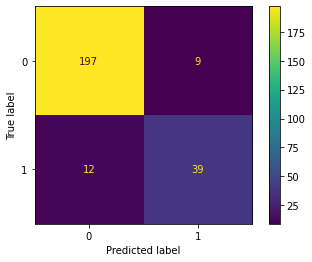

In [25]:
svc.fit(length_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, length_test, y_test)

In [26]:
# Testing accuracy metrics

predicted_y = svc.predict(length_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9182879377431906
Precision:	 0.8125
Recall:		 0.7647058823529411
F1:		 0.787878787878788


In [27]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [28]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\120.png,1
0,MP22\Slabs\454.png,1
0,MP22-12_19\Slabs\70.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\25.png,1
0,MP22-12_19\Slabs\193.png,1
0,MP22\Slabs\179.png,1
0,MP22-12_19\Slabs\69.png,1
0,MP18-17\Slabs\88.png,1
0,MP22-12_19\Slabs\234.png,1


In [29]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22-12_19\Slabs\199.png,0
0,MP18-17\Slabs\97.png,0
0,MP22\Slabs\423.png,0
0,MP22-12_19\Slabs\240.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\498.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\458.png,0


## LBP (Default)
### All Bins

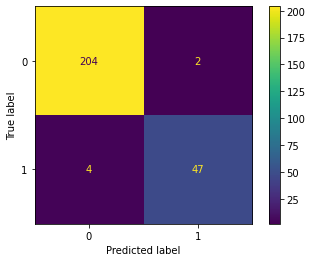

In [30]:
svc.fit(lbp_def_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, lbp_def_test, y_test)

In [31]:
# Testing accuracy metrics

predicted_y = svc.predict(lbp_def_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9766536964980544
Precision:	 0.9591836734693877
Recall:		 0.9215686274509803
F1:		 0.9400000000000001


In [32]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [33]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\89.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1


In [34]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0


### 10 bins

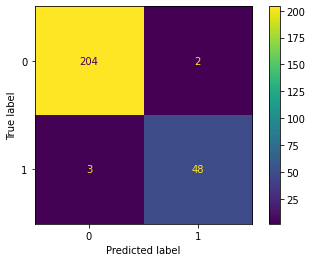

In [35]:
svc.fit(lbp_def_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, lbp_def_10_test, y_test)

In [36]:
Testing accuracy metrics

predicted_y = svc.predict(lbp_def_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.980544747081712
Precision:	 0.96
Recall:		 0.9411764705882353
F1:		 0.9504950495049505


In [37]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [38]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1


In [39]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\26.png,0
0,MP22\Slabs\127.png,0


## LBP (Ror)
### All Bins

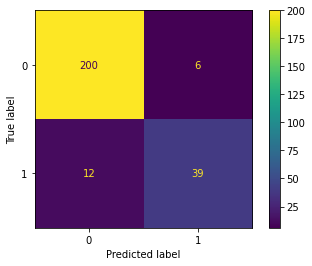

In [40]:
svc.fit(lbp_ror_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, lbp_ror_test, y_test)

In [41]:
# Testing accuracy metrics

predicted_y = svc.predict(lbp_ror_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9299610894941635
Precision:	 0.8666666666666667
Recall:		 0.7647058823529411
F1:		 0.8125


In [42]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [43]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\89.png,1
0,MP22-12_19\Slabs\121.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\36.png,1
0,MP22\Slabs\493.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\1.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\450.png,1


In [44]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP18-17\Slabs\26.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\350.png,0


### 10 bins

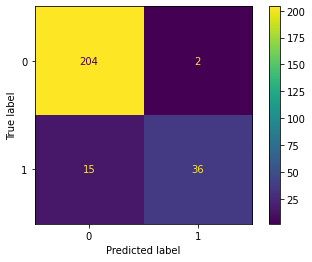

In [45]:
svc.fit(lbp_ror_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, lbp_ror_10_test, y_test)

In [46]:
Testing accuracy metrics

predicted_y = svc.predict(lbp_ror_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.933852140077821
Precision:	 0.9473684210526315
Recall:		 0.7058823529411765
F1:		 0.8089887640449439


In [47]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [48]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22\Slabs\89.png,1
0,MP22-12_19\Slabs\120.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\36.png,1
0,MP22\Slabs\493.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\497.png,1


In [49]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\127.png,0
0,MP22\Slabs\350.png,0


## LBP (Uniform)
### All Bins

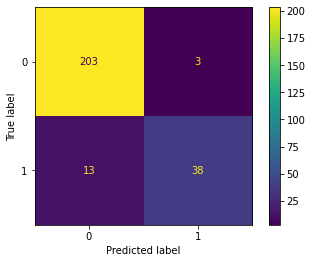

In [50]:
svc.fit(lbp_uni_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, lbp_uni_test, y_test)

In [51]:
# Testing accuracy metrics

predicted_y = svc.predict(lbp_uni_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9377431906614786
Precision:	 0.926829268292683
Recall:		 0.7450980392156863
F1:		 0.8260869565217392


In [52]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [53]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22\Slabs\89.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\36.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\1.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\450.png,1


In [54]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\26.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\350.png,0


### 10 bins

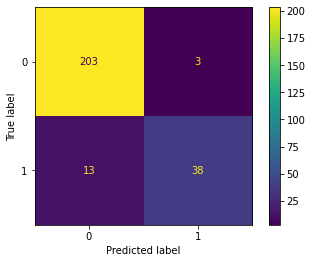

In [55]:
svc.fit(lbp_uni_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, lbp_uni_10_test, y_test)

In [56]:
Testing accuracy metrics

predicted_y = svc.predict(lbp_uni_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9377431906614786
Precision:	 0.926829268292683
Recall:		 0.7450980392156863
F1:		 0.8260869565217392


In [57]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [58]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22\Slabs\89.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\36.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\1.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\450.png,1


In [59]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\26.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\350.png,0


## LBP (Non-rotation invariant uniform)
### All Bins

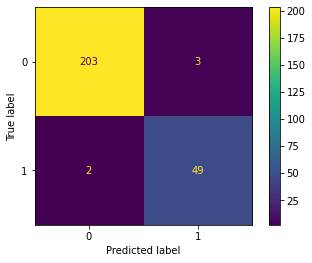

In [60]:
svc.fit(lbp_nri_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, lbp_nri_test, y_test)

In [61]:
# Testing accuracy metrics

predicted_y = svc.predict(lbp_nri_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.980544747081712
Precision:	 0.9423076923076923
Recall:		 0.9607843137254902
F1:		 0.9514563106796117


In [62]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [63]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1


In [64]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0


### 10 bins

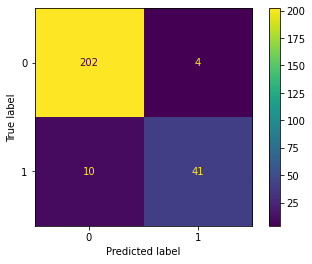

In [65]:
svc.fit(lbp_nri_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, lbp_nri_10_test, y_test)

In [66]:
Testing accuracy metrics

predicted_y = svc.predict(lbp_nri_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9455252918287937
Precision:	 0.9111111111111111
Recall:		 0.803921568627451
F1:		 0.8541666666666666


In [67]:
# fn = []
# fp = []

# for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
#     if pred == 0 and gt == 1:
#         fn.append(i)
#     elif pred == 1 and gt == 0:
#         fp.append(i)
        
# svc_fn.update(fn)
# svc_fp.update(fp)

In [68]:
# print("False Negatives:")
# master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\121.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\232.png,1
0,MP22\Slabs\36.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\450.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\124.png,1


In [69]:
# print("False Positives:")
# master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\103.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\350.png,0


## Color Histogram
### Unprocessed
#### 256 bins

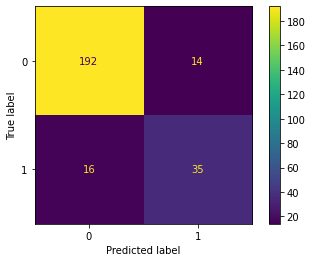

In [70]:
svc.fit(c_256_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, c_256_test, y_test)

In [71]:
# Testing accuracy metrics

predicted_y = svc.predict(c_256_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8832684824902723
Precision:	 0.7142857142857143
Recall:		 0.6862745098039216
F1:		 0.7000000000000001


In [72]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [73]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\43.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\493.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22\Slabs\1.png,1
0,MP22\Slabs\138.png,1
0,MP22\Slabs\180.png,1


In [74]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP18-17\Slabs\80.png,0
0,MP18-17\Slabs\63.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\239.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP18-17\Slabs\72.png,0
0,MP22\Slabs\11.png,0
0,MP18-17\Slabs\64.png,0
0,MP18-17\Slabs\29.png,0


#### 128 bins

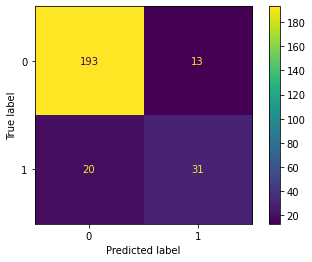

In [75]:
svc.fit(c_128_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, c_128_test, y_test)

In [76]:
# Testing accuracy metrics

predicted_y = svc.predict(c_128_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8715953307392996
Precision:	 0.7045454545454546
Recall:		 0.6078431372549019
F1:		 0.6526315789473683


In [77]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [78]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22\Slabs\523.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\43.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\493.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22\Slabs\1.png,1


In [79]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP18-17\Slabs\80.png,0
0,MP18-17\Slabs\63.png,0
0,MP22\Slabs\239.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP18-17\Slabs\72.png,0
0,MP22\Slabs\505.png,0
0,MP18-17\Slabs\64.png,0
0,MP18-17\Slabs\29.png,0
0,MP18-17\Slabs\53.png,0


#### 64 bins

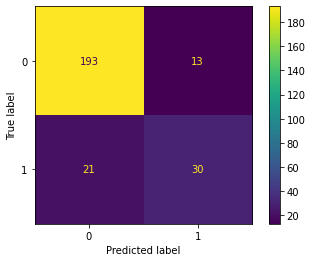

In [80]:
svc.fit(c_64_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, c_64_test, y_test)

In [81]:
# Testing accuracy metrics

predicted_y = svc.predict(c_64_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.867704280155642
Precision:	 0.6976744186046512
Recall:		 0.5882352941176471
F1:		 0.6382978723404256


In [82]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [83]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\43.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\493.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22-12_19\Slabs\119.png,1
0,MP22\Slabs\1.png,1


In [84]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP18-17\Slabs\68.png,0
0,MP18-17\Slabs\63.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP18-17\Slabs\72.png,0
0,MP22\Slabs\505.png,0
0,MP18-17\Slabs\64.png,0
0,MP18-17\Slabs\29.png,0
0,MP18-17\Slabs\53.png,0
0,MP22\Slabs\127.png,0


#### 32 bins

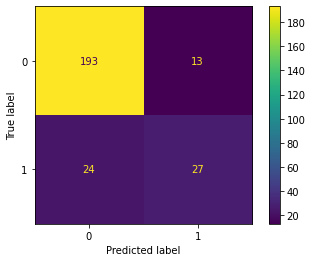

In [85]:
svc.fit(c_32_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, c_32_test, y_test)

In [86]:
# Testing accuracy metrics

predicted_y = svc.predict(c_32_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8560311284046692
Precision:	 0.675
Recall:		 0.5294117647058824
F1:		 0.5934065934065933


In [87]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [88]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22\Slabs\523.png,1
0,MP22-12_19\Slabs\121.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\43.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\493.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1


In [89]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP18-17\Slabs\63.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP18-17\Slabs\72.png,0
0,MP22\Slabs\505.png,0
0,MP18-17\Slabs\64.png,0
0,MP18-17\Slabs\29.png,0
0,MP18-17\Slabs\53.png,0
0,MP18-17\Slabs\69.png,0


### Smoothed
#### 256 bins

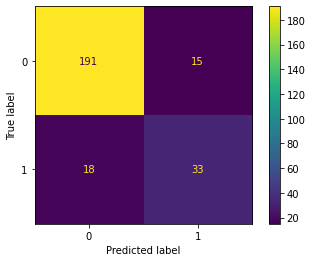

In [90]:
svc.fit(s_256_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, s_256_test, y_test)

In [91]:
# Testing accuracy metrics

predicted_y = svc.predict(s_256_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8715953307392996
Precision:	 0.6875
Recall:		 0.6470588235294118
F1:		 0.6666666666666667


In [92]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [93]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\43.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\493.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22\Slabs\1.png,1
0,MP22\Slabs\138.png,1
0,MP22\Slabs\180.png,1


In [94]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP18-17\Slabs\80.png,0
0,MP18-17\Slabs\68.png,0
0,MP18-17\Slabs\63.png,0
0,MP22\Slabs\239.png,0
0,MP22\Slabs\26.png,0
0,MP18-17\Slabs\76.png,0
0,MP22\Slabs\37.png,0
0,MP18-17\Slabs\72.png,0
0,MP22\Slabs\11.png,0
0,MP18-17\Slabs\64.png,0


#### 128 bins

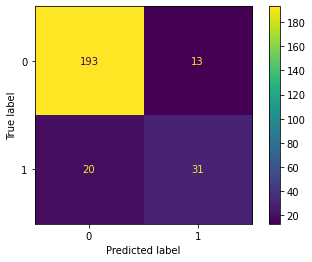

In [95]:
svc.fit(s_128_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, s_128_test, y_test)

In [96]:
# Testing accuracy metrics

predicted_y = svc.predict(s_128_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8715953307392996
Precision:	 0.7045454545454546
Recall:		 0.6078431372549019
F1:		 0.6526315789473683


In [97]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [98]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\43.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\493.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22\Slabs\1.png,1
0,MP22\Slabs\138.png,1


In [99]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP18-17\Slabs\68.png,0
0,MP18-17\Slabs\63.png,0
0,MP22\Slabs\239.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP18-17\Slabs\72.png,0
0,MP18-17\Slabs\64.png,0
0,MP18-17\Slabs\29.png,0
0,MP18-17\Slabs\53.png,0
0,MP22\Slabs\127.png,0


#### 64 bins

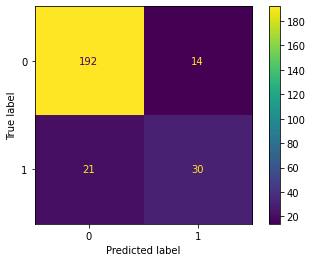

In [100]:
svc.fit(s_64_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, s_64_test, y_test)

In [101]:
# Testing accuracy metrics

predicted_y = svc.predict(s_64_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8638132295719845
Precision:	 0.6818181818181818
Recall:		 0.5882352941176471
F1:		 0.631578947368421


In [102]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [103]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\43.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\493.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22-12_19\Slabs\119.png,1
0,MP22\Slabs\1.png,1


In [104]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP18-17\Slabs\80.png,0
0,MP18-17\Slabs\68.png,0
0,MP18-17\Slabs\63.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP18-17\Slabs\72.png,0
0,MP22\Slabs\505.png,0
0,MP18-17\Slabs\64.png,0
0,MP18-17\Slabs\29.png,0
0,MP18-17\Slabs\53.png,0


#### 32 bins

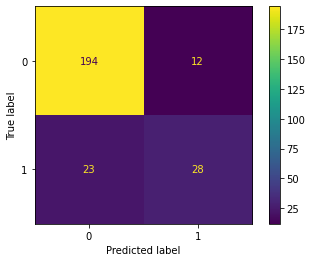

In [105]:
svc.fit(s_32_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, s_32_test, y_test)

In [106]:
# Testing accuracy metrics

predicted_y = svc.predict(s_32_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8638132295719845
Precision:	 0.7
Recall:		 0.5490196078431373
F1:		 0.6153846153846154


In [107]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [108]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22-12_19\Slabs\121.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\493.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22-12_19\Slabs\119.png,1
0,MP22\Slabs\1.png,1


In [109]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP18-17\Slabs\63.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP18-17\Slabs\72.png,0
0,MP22\Slabs\505.png,0
0,MP18-17\Slabs\64.png,0
0,MP18-17\Slabs\53.png,0
0,MP18-17\Slabs\69.png,0
0,MP22\Slabs\162.png,0


## Best features

In [110]:
length_train.set_index(lbp_nri_train.index)

,Length
336,7192
567,5924
933,7025
249,4926
558,6818
...,...
330,4588
214,1856
466,7188
121,5215


In [111]:
lbp_nri_train.index

Int64Index([336, 567, 933, 249, 558, 377,  71,  94,  33, 259,
            ...
            871,  99, 372,  87, 458, 330, 214, 466, 121, 860],
           dtype='int64', length=770)

In [112]:
lbp_nri_train.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
336,0.001917,0.003206,3.049197e-07,0.004170,2.668047e-07,0.003207,4.573795e-07,0.004189,3.430347e-07,0.001083,...,0.004265,0.001877,0.004210,0.001389,0.004138,0.001798,0.004134,0.001418,0.026396,0.019316
567,0.001882,0.003029,3.693761e-07,0.004262,3.693761e-07,0.003003,9.234402e-08,0.004316,3.232041e-07,0.001029,...,0.004704,0.002112,0.004647,0.001363,0.004571,0.002088,0.004604,0.001341,0.029828,0.018613
933,0.001995,0.002982,4.225138e-07,0.004675,4.609242e-07,0.002998,4.993345e-07,0.004664,8.450277e-07,0.001092,...,0.003643,0.002036,0.003581,0.001226,0.003565,0.002024,0.003570,0.001225,0.024837,0.019205
249,0.001953,0.003014,4.427578e-07,0.004418,1.660342e-07,0.003050,2.213789e-07,0.004420,3.874131e-07,0.001106,...,0.003936,0.002263,0.003867,0.001292,0.003778,0.002226,0.003800,0.001316,0.024951,0.019048
558,0.001781,0.003123,2.420307e-07,0.004139,1.613538e-07,0.003127,8.067689e-08,0.004237,2.823691e-07,0.000981,...,0.004889,0.001824,0.004824,0.001285,0.004701,0.001764,0.004738,0.001282,0.029275,0.019016


In [113]:
lbp_nri_test.isnull().values.any()

False

In [114]:
length_lbp_train = pd.concat([length_train.set_index(lbp_def_train.index), lbp_def_train], axis=1)
length_lbp_test = pd.concat([length_test.set_index(lbp_def_test.index), lbp_def_test], axis=1)

In [115]:
s_32_train.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
336,0.000000e+00,0.000001,0.000087,0.001043,0.004876,0.014771,0.035799,0.065991,0.096351,0.119105,...,0.000492,0.001117,0.001012,0.000183,1.486484e-05,1.143449e-07,0.0,0.0,0.0,0.0
567,0.000000e+00,0.000227,0.009572,0.032004,0.030665,0.024829,0.036455,0.068033,0.109109,0.136333,...,0.000265,0.000182,0.000144,0.000028,5.078921e-07,0.000000e+00,0.0,0.0,0.0,0.0
933,7.682070e-07,0.000612,0.008219,0.004509,0.012503,0.025678,0.042113,0.062806,0.083678,0.103263,...,0.000225,0.000378,0.000144,0.000001,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
249,2.988615e-06,0.000075,0.000202,0.001364,0.005144,0.013627,0.030805,0.057833,0.093721,0.130130,...,0.000604,0.000855,0.000712,0.000188,3.016288e-05,1.660342e-07,0.0,0.0,0.0,0.0
558,0.000000e+00,0.000037,0.000164,0.000991,0.004876,0.015630,0.036886,0.067175,0.099450,0.126136,...,0.000085,0.000097,0.000137,0.000035,5.647382e-07,0.000000e+00,0.0,0.0,0.0,0.0


In [116]:
three_train = pd.concat([length_lbp_train, c_64_train], axis=1)
three_test = pd.concat([length_lbp_test, c_64_test], axis=1)
three_train.describe()

,Length,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
count,770.000000,770.000000,770.000000,7.700000e+02,770.000000,770.000000,770.000000,770.000000,770.000000,7.700000e+02,...,770.000000,7.700000e+02,7.700000e+02,770.000000,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02
mean,5154.294805,0.001855,0.002978,3.502268e-07,0.001020,0.004361,0.000376,0.001667,0.027574,3.608469e-07,...,0.000017,9.373642e-06,4.591398e-06,0.000002,8.252754e-07,4.058796e-07,2.095713e-07,1.157986e-07,7.566355e-08,1.936470e-08
std,1594.208273,0.000206,0.000208,2.052261e-07,0.000173,0.000327,0.000043,0.000261,0.001133,2.090237e-07,...,0.000066,3.875912e-05,2.486609e-05,0.000018,9.323348e-06,5.231599e-06,3.351382e-06,2.344670e-06,1.851618e-06,4.975386e-07
min,1328.000000,0.000997,0.002252,0.000000e+00,0.000284,0.003065,0.000290,0.000306,0.024699,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4185.000000,0.001789,0.002892,2.050633e-07,0.000982,0.004205,0.000353,0.001598,0.027258,2.207724e-07,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5146.000000,0.001898,0.003005,3.395835e-07,0.001064,0.004341,0.000374,0.001705,0.027642,3.494855e-07,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6713.000000,0.001990,0.003095,4.724198e-07,0.001126,0.004517,0.000392,0.001803,0.027973,4.827881e-07,...,0.000003,8.046806e-07,8.341088e-08,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,12484.000000,0.002450,0.003669,1.547524e-06,0.001471,0.005283,0.000716,0.002204,0.034603,1.339330e-06,...,0.001078,4.692720e-04,4.659587e-04,0.000451,2.175236e-04,9.756138e-05,8.096408e-05,6.228006e-05,5.112759e-05,1.375955e-05


In [117]:
length_lbp_train.columns

Index(['Length', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '246', '247', '248', '249', '250', '251', '252', '253', '254', '255'],
      dtype='object', length=257)

In [118]:
length_lbp_test.isnull().values.any()

False

### Length and Local Binary Pattern (Default)

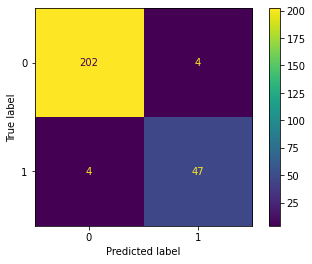

In [119]:
svc.fit(length_lbp_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, length_lbp_test, y_test)

In [120]:
# Testing accuracy metrics

predicted_y = svc.predict(length_lbp_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9688715953307393
Precision:	 0.9215686274509803
Recall:		 0.9215686274509803
F1:		 0.9215686274509803


In [121]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [122]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\89.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1


In [123]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22-12_19\Slabs\199.png,0
0,MP22\Slabs\423.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\605.png,0


### Feature sets of three best configurations

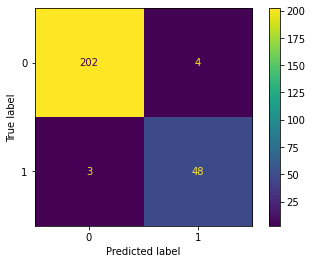

In [124]:
svc.fit(three_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(svc, three_test, y_test)

In [125]:
# Testing accuracy metrics

predicted_y = svc.predict(three_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9727626459143969
Precision:	 0.9230769230769231
Recall:		 0.9411764705882353
F1:		 0.9320388349514563


In [126]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [127]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\89.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1


In [128]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\162.png,0
0,MP22\Slabs\605.png,0


# Decision Tree

In [129]:
dt = Pipeline([('decision_tree', DecisionTreeClassifier(random_state=42))])
dt_fn = Counter()
dt_fp = Counter()

## Length

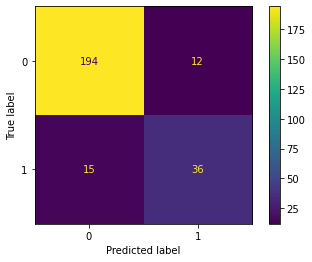

In [130]:
dt.fit(length_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, length_test, y_test)

In [131]:
# Testing accuracy metrics

predicted_y = dt.predict(length_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8949416342412452
Precision:	 0.75
Recall:		 0.7058823529411765
F1:		 0.7272727272727272


In [132]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [133]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\244.png,1
0,MP22-12_19\Slabs\120.png,1
0,MP22-12_19\Slabs\72.png,1
0,MP22-12_19\Slabs\210.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22-12_19\Slabs\119.png,1
0,MP22\Slabs\138.png,1
0,MP22-12_19\Slabs\70.png,1
0,MP22-12_19\Slabs\148.png,1
0,MP22\Slabs\25.png,1


In [134]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\515.png,0
0,MP22-12_19\Slabs\26.png,0
0,MP18-17\Slabs\112.png,0
0,MP18-17\Slabs\97.png,0
0,MP22\Slabs\423.png,0
0,MP22\Slabs\501.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\510.png,0
0,MP22-12_19\Slabs\174.png,0
0,MP22\Slabs\458.png,0


## LBP (Default)
### All Bins

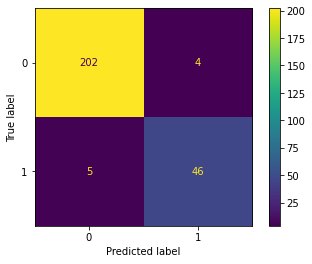

In [135]:
dt.fit(lbp_def_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, lbp_def_test, y_test)

In [136]:
# Testing accuracy metrics

predicted_y = dt.predict(lbp_def_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9649805447470817
Precision:	 0.92
Recall:		 0.9019607843137255
F1:		 0.9108910891089109


In [137]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [138]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\25.png,1
0,MP22\Slabs\429.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1
0,MP22\Slabs\496.png,1


In [139]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP22\Slabs\505.png,0


### 10 bins

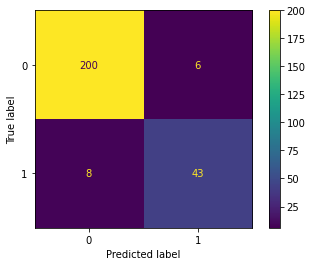

In [140]:
dt.fit(lbp_def_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, lbp_def_10_test, y_test)

In [141]:
# Testing accuracy metrics

predicted_y = dt.predict(lbp_def_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9455252918287937
Precision:	 0.8775510204081632
Recall:		 0.8431372549019608
F1:		 0.86


In [142]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [143]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\89.png,1
0,MP22\Slabs\493.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1
0,MP18-17\Slabs\152.png,1


In [144]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22-12_19\Slabs\141.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\350.png,0


## LBP (Ror)
### All Bins

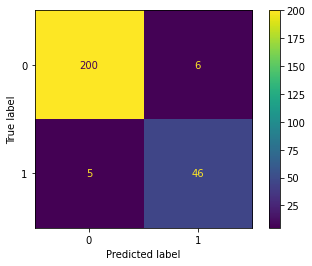

In [145]:
dt.fit(lbp_ror_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, lbp_ror_test, y_test)

In [146]:
# Testing accuracy metrics

predicted_y = dt.predict(lbp_ror_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9571984435797666
Precision:	 0.8846153846153846
Recall:		 0.9019607843137255
F1:		 0.8932038834951457


In [147]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [148]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\454.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1


In [149]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\577.png,0
0,MP22\Slabs\582.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\593.png,0
0,MP22\Slabs\580.png,0


### 10 bins

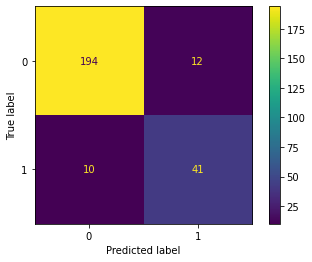

In [150]:
dt.fit(lbp_ror_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, lbp_ror_10_test, y_test)

In [151]:
# Testing accuracy metrics

predicted_y = dt.predict(lbp_ror_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.914396887159533
Precision:	 0.7735849056603774
Recall:		 0.803921568627451
F1:		 0.7884615384615384


In [152]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [153]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22\Slabs\485.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\36.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\429.png,1
0,MP22\Slabs\450.png,1
0,MP22\Slabs\478.png,1


In [154]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP18-17\Slabs\36.png,0
0,MP22\Slabs\178.png,0
0,MP22\Slabs\569.png,0
0,MP18-17\Slabs\63.png,0
0,MP22\Slabs\444.png,0
0,MP22\Slabs\239.png,0
0,MP18-17\Slabs\44.png,0
0,MP22\Slabs\544.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\127.png,0


## LBP (Uniform)
### All Bins

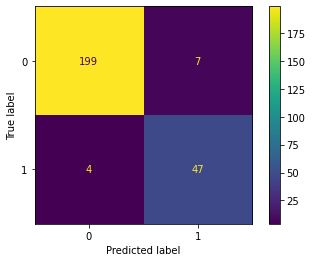

In [155]:
dt.fit(lbp_uni_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, lbp_uni_test, y_test)

In [156]:
# Testing accuracy metrics

predicted_y = dt.predict(lbp_uni_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9571984435797666
Precision:	 0.8703703703703703
Recall:		 0.9215686274509803
F1:		 0.8952380952380952


In [157]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [158]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\25.png,1
0,MP22\Slabs\450.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\124.png,1


In [159]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\582.png,0
0,MP18-17\Slabs\80.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\103.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\162.png,0


### 10 bins

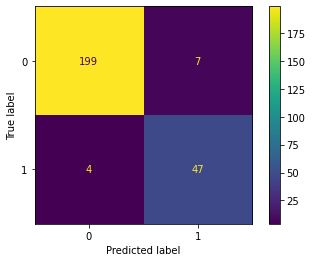

In [160]:
dt.fit(lbp_uni_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, lbp_uni_10_test, y_test)

In [161]:
# Testing accuracy metrics

predicted_y = dt.predict(lbp_uni_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9571984435797666
Precision:	 0.8703703703703703
Recall:		 0.9215686274509803
F1:		 0.8952380952380952


In [162]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [163]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\25.png,1
0,MP22\Slabs\450.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\124.png,1


In [164]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\582.png,0
0,MP18-17\Slabs\80.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\103.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\162.png,0


## LBP (Non-rotation invariant uniform)
### All Bins

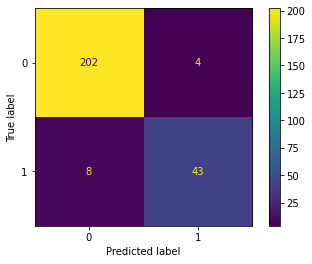

In [165]:
dt.fit(lbp_nri_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, lbp_nri_test, y_test)

In [166]:
# Testing accuracy metrics

predicted_y = dt.predict(lbp_nri_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.953307392996109
Precision:	 0.9148936170212766
Recall:		 0.8431372549019608
F1:		 0.8775510204081632


In [167]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [168]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\120.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\429.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\198.png,1


In [169]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\26.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\350.png,0
0,MP22\Slabs\583.png,0


### 10 bins

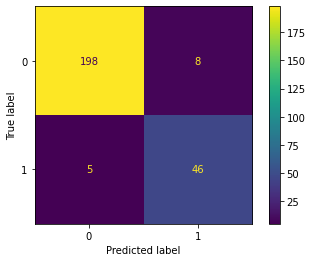

In [170]:
dt.fit(lbp_nri_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, lbp_nri_10_test, y_test)

In [171]:
# Testing accuracy metrics

predicted_y = dt.predict(lbp_nri_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9494163424124513
Precision:	 0.8518518518518519
Recall:		 0.9019607843137255
F1:		 0.8761904761904761


In [172]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [173]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\89.png,1
0,MP22-12_19\Slabs\120.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1


In [174]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22-12_19\Slabs\128.png,0
0,MP22\Slabs\587.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\126.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\593.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\350.png,0


## Color Histogram
### Unprocessed
#### 256 bins

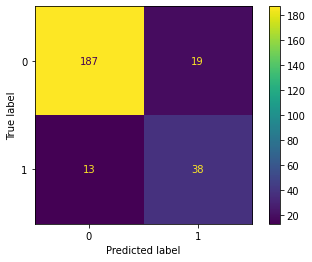

In [175]:
dt.fit(c_256_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, c_256_test, y_test)

In [176]:
# Testing accuracy metrics

predicted_y = dt.predict(c_256_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8754863813229572
Precision:	 0.6666666666666666
Recall:		 0.7450980392156863
F1:		 0.7037037037037038


In [177]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [178]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22-12_19\Slabs\211.png,1
0,MP18-17\Slabs\150.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\232.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1


In [179]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22-12_19\Slabs\199.png,0
0,MP18-17\Slabs\68.png,0
0,MP22\Slabs\545.png,0
0,MP22-12_19\Slabs\61.png,0
0,MP18-17\Slabs\63.png,0
0,MP22\Slabs\444.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\239.png,0
0,MP22\Slabs\26.png,0
0,MP18-17\Slabs\76.png,0


#### 128 bins

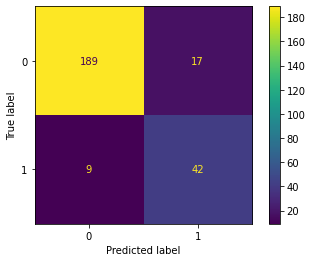

In [180]:
dt.fit(c_128_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, c_128_test, y_test)

In [181]:
# Testing accuracy metrics

predicted_y = dt.predict(c_128_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8988326848249028
Precision:	 0.711864406779661
Recall:		 0.8235294117647058
F1:		 0.7636363636363636


In [182]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [183]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\232.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\233.png,1
0,MP22-12_19\Slabs\124.png,1


In [184]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22-12_19\Slabs\199.png,0
0,MP18-17\Slabs\68.png,0
0,MP18-17\Slabs\97.png,0
0,MP22-12_19\Slabs\61.png,0
0,MP22\Slabs\444.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22-12_19\Slabs\200.png,0
0,MP22\Slabs\11.png,0


#### 64 bins

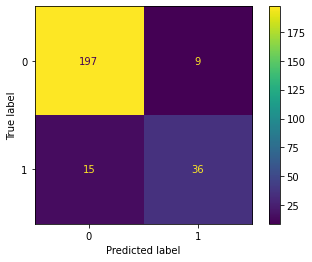

In [185]:
dt.fit(c_64_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, c_64_test, y_test)

In [186]:
# Testing accuracy metrics

predicted_y = dt.predict(c_64_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9066147859922179
Precision:	 0.8
Recall:		 0.7058823529411765
F1:		 0.7500000000000001


In [187]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [188]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP18-17\Slabs\150.png,1
0,MP22-12_19\Slabs\232.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22-12_19\Slabs\22.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\233.png,1


In [189]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP18-17\Slabs\97.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\140.png,0
0,MP22\Slabs\162.png,0
0,MP22-12_19\Slabs\190.png,0
0,MP22\Slabs\81.png,0


#### 32 bins

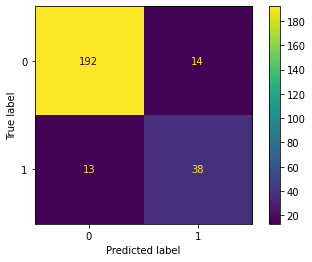

In [190]:
dt.fit(c_32_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, c_32_test, y_test)

In [191]:
# Testing accuracy metrics

predicted_y = dt.predict(c_32_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8949416342412452
Precision:	 0.7307692307692307
Recall:		 0.7450980392156863
F1:		 0.7378640776699028


In [192]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [193]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\211.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\232.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22-12_19\Slabs\22.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\163.png,1


In [194]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\444.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP18-17\Slabs\72.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\117.png,0
0,MP18-17\Slabs\64.png,0
0,MP22\Slabs\344.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\350.png,0


### Smoothed
#### 256 bins

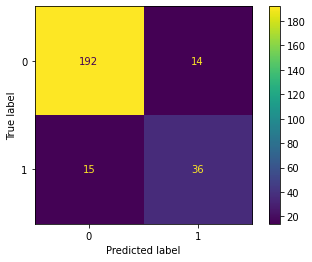

In [195]:
dt.fit(s_256_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, s_256_test, y_test)

In [196]:
# Testing accuracy metrics

predicted_y = dt.predict(s_256_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8871595330739299
Precision:	 0.72
Recall:		 0.7058823529411765
F1:		 0.712871287128713


In [197]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [198]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\211.png,1
0,MP22\Slabs\89.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\210.png,1
0,MP22-12_19\Slabs\232.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1


In [199]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22-12_19\Slabs\61.png,0
0,MP22\Slabs\501.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\11.png,0
0,MP22-12_19\Slabs\192.png,0
0,MP22\Slabs\344.png,0
0,MP22\Slabs\127.png,0
0,MP18-17\Slabs\69.png,0


#### 128 bins

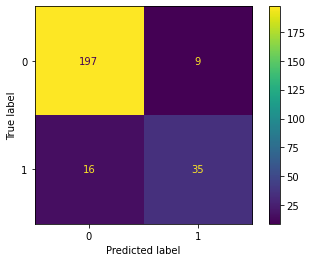

In [200]:
dt.fit(s_128_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, s_128_test, y_test)

In [201]:
# Testing accuracy metrics

predicted_y = dt.predict(s_128_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9027237354085603
Precision:	 0.7954545454545454
Recall:		 0.6862745098039216
F1:		 0.736842105263158


In [202]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [203]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\232.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22-12_19\Slabs\22.png,1


In [204]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\501.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22-12_19\Slabs\192.png,0
0,MP18-17\Slabs\64.png,0
0,MP22\Slabs\127.png,0
0,MP18-17\Slabs\69.png,0
0,MP22\Slabs\431.png,0
0,MP22\Slabs\81.png,0


#### 64 bins

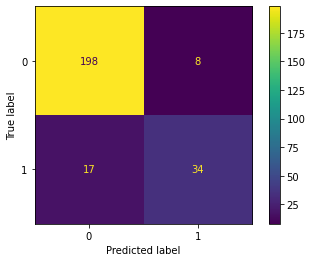

In [205]:
dt.fit(s_64_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, s_64_test, y_test)

In [206]:
# Testing accuracy metrics

predicted_y = dt.predict(s_64_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9027237354085603
Precision:	 0.8095238095238095
Recall:		 0.6666666666666666
F1:		 0.7311827956989246


In [207]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [208]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP18-17\Slabs\150.png,1
0,MP22-12_19\Slabs\232.png,1
0,MP22-12_19\Slabs\116.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22\Slabs\138.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\156.png,1
0,MP22\Slabs\179.png,1


In [209]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\501.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\140.png,0
0,MP22\Slabs\431.png,0
0,MP22\Slabs\81.png,0


#### 32 bins

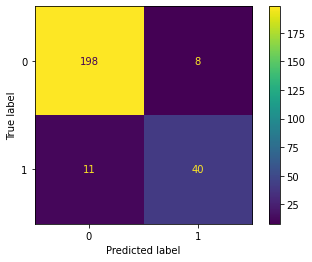

In [210]:
dt.fit(s_32_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, s_32_test, y_test)

In [211]:
# Testing accuracy metrics

predicted_y = dt.predict(s_32_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9260700389105059
Precision:	 0.8333333333333334
Recall:		 0.7843137254901961
F1:		 0.8080808080808081


In [212]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [213]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\211.png,1
0,MP22-12_19\Slabs\43.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22-12_19\Slabs\22.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\74.png,1
0,MP18-17\Slabs\152.png,1


In [214]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\118.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\276.png,0
0,MP22\Slabs\431.png,0
0,MP22\Slabs\170.png,0
0,MP22\Slabs\81.png,0


## Best features

### Length and Local Binary Pattern (Default)

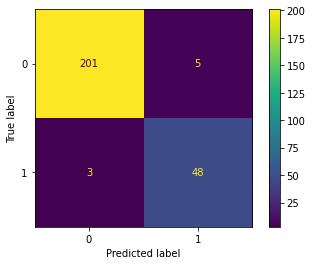

In [215]:
dt.fit(length_lbp_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, length_lbp_test, y_test)

In [216]:
# Testing accuracy metrics

predicted_y = dt.predict(length_lbp_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9688715953307393
Precision:	 0.9056603773584906
Recall:		 0.9411764705882353
F1:		 0.923076923076923


In [217]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
dt_fn.update(fn)
dt_fp.update(fp)

In [218]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\25.png,1
0,MP22\Slabs\429.png,1
0,MP22\Slabs\478.png,1


In [219]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\350.png,0


### Feature sets of three best configurations

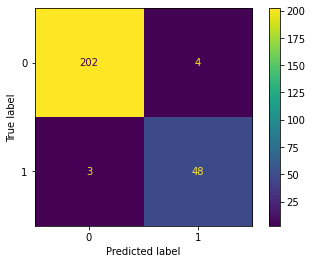

In [220]:
dt.fit(three_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(dt, three_test, y_test)

In [221]:
# Testing accuracy metrics

predicted_y = dt.predict(three_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9727626459143969
Precision:	 0.9230769230769231
Recall:		 0.9411764705882353
F1:		 0.9320388349514563


In [222]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
svc_fn.update(fn)
svc_fp.update(fp)

In [223]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1


In [224]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\350.png,0


# Random Forest

In [225]:
rf = Pipeline([('random_forest', RandomForestClassifier(random_state=42))])
rf_fn = Counter()
rf_fp = Counter()

## Length

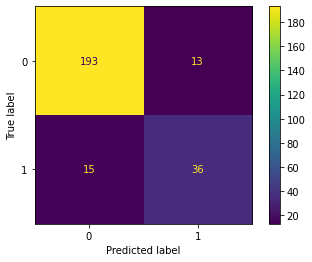

In [226]:
rf.fit(length_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, length_test, y_test)

In [227]:
# Testing accuracy metrics

predicted_y = rf.predict(length_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.8910505836575876
Precision:	 0.7346938775510204
Recall:		 0.7058823529411765
F1:		 0.7200000000000001


In [228]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [229]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\244.png,1
0,MP22-12_19\Slabs\120.png,1
0,MP22-12_19\Slabs\72.png,1
0,MP22-12_19\Slabs\210.png,1
0,MP22-12_19\Slabs\112.png,1
0,MP22-12_19\Slabs\119.png,1
0,MP22\Slabs\138.png,1
0,MP22-12_19\Slabs\70.png,1
0,MP22-12_19\Slabs\148.png,1
0,MP22\Slabs\25.png,1


In [230]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\515.png,0
0,MP22-12_19\Slabs\26.png,0
0,MP18-17\Slabs\112.png,0
0,MP18-17\Slabs\97.png,0
0,MP22\Slabs\423.png,0
0,MP18-17\Slabs\26.png,0
0,MP22\Slabs\501.png,0
0,MP22\Slabs\477.png,0
0,MP22\Slabs\510.png,0
0,MP22-12_19\Slabs\174.png,0


## LBP (Default)
### All Bins

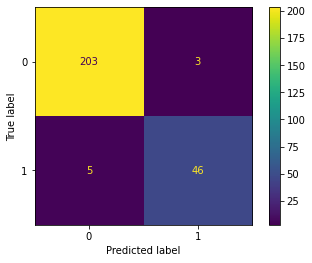

In [231]:
rf.fit(lbp_def_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, lbp_def_test, y_test)

In [232]:
# Testing accuracy metrics

predicted_y = rf.predict(lbp_def_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9688715953307393
Precision:	 0.9387755102040817
Recall:		 0.9019607843137255
F1:		 0.92


In [233]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [234]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\54.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1


In [235]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\350.png,0


### 10 bins

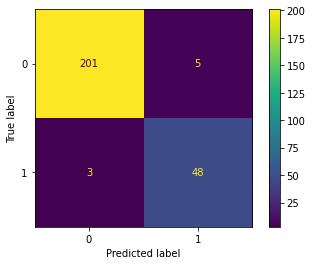

In [236]:
rf.fit(lbp_def_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, lbp_def_10_test, y_test)

In [237]:
# Testing accuracy metrics

predicted_y = rf.predict(lbp_def_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9688715953307393
Precision:	 0.9056603773584906
Recall:		 0.9411764705882353
F1:		 0.923076923076923


In [238]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [239]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1


In [240]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\37.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\350.png,0


## LBP (Ror)
### All Bins

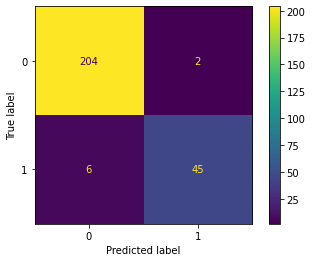

In [241]:
rf.fit(lbp_ror_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, lbp_ror_test, y_test)

In [242]:
# Testing accuracy metrics

predicted_y = rf.predict(lbp_ror_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9688715953307393
Precision:	 0.9574468085106383
Recall:		 0.8823529411764706
F1:		 0.9183673469387754


In [243]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [244]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\54.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\450.png,1
0,MP22\Slabs\478.png,1


In [245]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0


### 10 bins

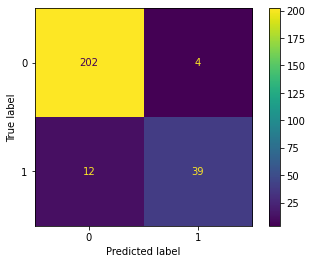

In [246]:
rf.fit(lbp_ror_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, lbp_ror_10_test, y_test)

In [247]:
# Testing accuracy metrics

predicted_y = rf.predict(lbp_ror_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9377431906614786
Precision:	 0.9069767441860465
Recall:		 0.7647058823529411
F1:		 0.8297872340425532


In [248]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [249]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\490.png,1
0,MP22\Slabs\89.png,1
0,MP22\Slabs\485.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22\Slabs\88.png,1
0,MP22\Slabs\36.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\429.png,1


In [250]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\239.png,0
0,MP22\Slabs\544.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\350.png,0


## LBP (Uniform)
### All Bins

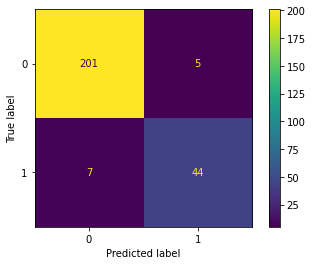

In [251]:
rf.fit(lbp_uni_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, lbp_uni_test, y_test)

In [252]:
# Testing accuracy metrics

predicted_y = rf.predict(lbp_uni_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.953307392996109
Precision:	 0.8979591836734694
Recall:		 0.8627450980392157
F1:		 0.8799999999999999


In [253]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [254]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\54.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\450.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\124.png,1


In [255]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\162.png,0
0,MP22\Slabs\350.png,0


### 10 bins

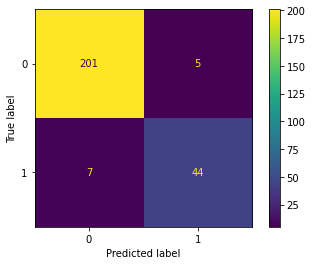

In [256]:
rf.fit(lbp_uni_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, lbp_uni_10_test, y_test)

In [257]:
# Testing accuracy metrics

predicted_y = rf.predict(lbp_uni_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.953307392996109
Precision:	 0.8979591836734694
Recall:		 0.8627450980392157
F1:		 0.8799999999999999


In [258]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [259]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22-12_19\Slabs\54.png,1
0,MP22\Slabs\454.png,1
0,MP22\Slabs\497.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\450.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\124.png,1


In [260]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\162.png,0
0,MP22\Slabs\350.png,0


## LBP (Non-rotation invariant uniform)
### All Bins

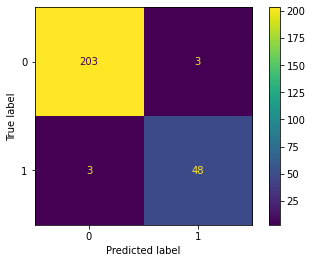

In [261]:
rf.fit(lbp_nri_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, lbp_nri_test, y_test)

In [262]:
# Testing accuracy metrics

predicted_y = rf.predict(lbp_nri_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9766536964980544
Precision:	 0.9411764705882353
Recall:		 0.9411764705882353
F1:		 0.9411764705882353


In [263]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [264]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\454.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1


In [265]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\350.png,0


### 10 bins

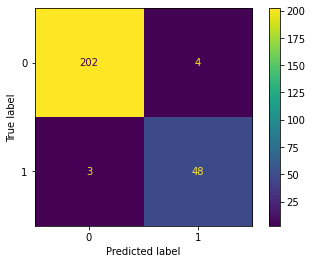

In [266]:
rf.fit(lbp_nri_10_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, lbp_nri_10_test, y_test)

In [267]:
# Testing accuracy metrics

predicted_y = rf.predict(lbp_nri_10_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9727626459143969
Precision:	 0.9230769230769231
Recall:		 0.9411764705882353
F1:		 0.9320388349514563


In [268]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [269]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\454.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1


In [270]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\350.png,0


## Color Histogram
### Unprocessed
#### 256 bins

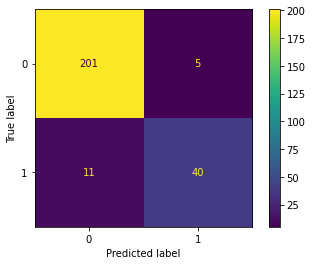

In [271]:
rf.fit(c_256_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, c_256_test, y_test)

In [272]:
# Testing accuracy metrics

predicted_y = rf.predict(c_256_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9377431906614786
Precision:	 0.8888888888888888
Recall:		 0.7843137254901961
F1:		 0.8333333333333334


In [273]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [274]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP18-17\Slabs\150.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\163.png,1
0,MP18-17\Slabs\88.png,1
0,MP18-17\Slabs\152.png,1


In [275]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\431.png,0
0,MP22\Slabs\81.png,0


#### 128 bins

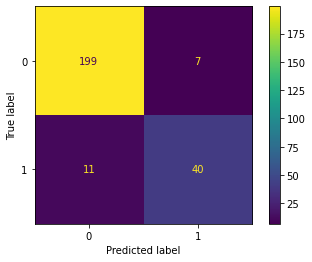

In [276]:
rf.fit(c_128_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, c_128_test, y_test)

In [277]:
# Testing accuracy metrics

predicted_y = rf.predict(c_128_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9299610894941635
Precision:	 0.851063829787234
Recall:		 0.7843137254901961
F1:		 0.8163265306122448


In [278]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [279]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP18-17\Slabs\150.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\163.png,1
0,MP18-17\Slabs\88.png,1
0,MP18-17\Slabs\152.png,1


In [280]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP18-17\Slabs\64.png,0
0,MP22\Slabs\127.png,0
0,MP22\Slabs\431.png,0
0,MP22\Slabs\81.png,0


#### 64 bins

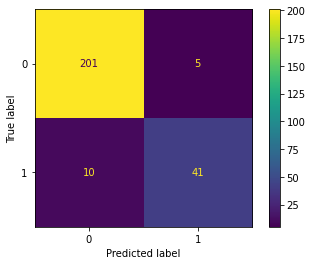

In [281]:
rf.fit(c_64_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, c_64_test, y_test)

In [282]:
# Testing accuracy metrics

predicted_y = rf.predict(c_64_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9416342412451362
Precision:	 0.8913043478260869
Recall:		 0.803921568627451
F1:		 0.845360824742268


In [283]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [284]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP18-17\Slabs\150.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1
0,MP18-17\Slabs\152.png,1
0,MP22-12_19\Slabs\124.png,1


In [285]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\431.png,0
0,MP22\Slabs\81.png,0


#### 32 bins

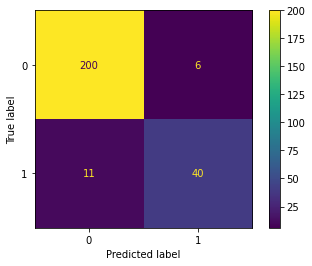

In [286]:
rf.fit(c_32_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, c_32_test, y_test)

In [287]:
# Testing accuracy metrics

predicted_y = rf.predict(c_32_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.933852140077821
Precision:	 0.8695652173913043
Recall:		 0.7843137254901961
F1:		 0.8247422680412372


In [288]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [289]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP18-17\Slabs\150.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22\Slabs\478.png,1
0,MP22-12_19\Slabs\163.png,1
0,MP18-17\Slabs\88.png,1
0,MP18-17\Slabs\152.png,1


In [290]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP18-17\Slabs\72.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\431.png,0
0,MP22\Slabs\81.png,0


### Smoothed
#### 256 bins

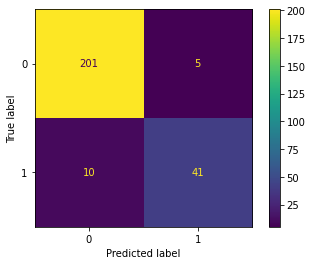

In [291]:
rf.fit(s_256_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, s_256_test, y_test)

In [292]:
# Testing accuracy metrics

predicted_y = rf.predict(s_256_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9416342412451362
Precision:	 0.8913043478260869
Recall:		 0.803921568627451
F1:		 0.845360824742268


In [293]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [294]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP18-17\Slabs\150.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1
0,MP18-17\Slabs\152.png,1
0,MP22-12_19\Slabs\124.png,1


In [295]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\431.png,0
0,MP22\Slabs\81.png,0


#### 128 bins

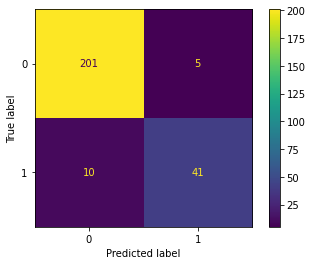

In [296]:
rf.fit(s_128_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, s_128_test, y_test)

In [297]:
# Testing accuracy metrics

predicted_y = rf.predict(s_128_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9416342412451362
Precision:	 0.8913043478260869
Recall:		 0.803921568627451
F1:		 0.845360824742268


In [298]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [299]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP18-17\Slabs\150.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1
0,MP18-17\Slabs\152.png,1
0,MP22-12_19\Slabs\124.png,1


In [300]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\431.png,0
0,MP22\Slabs\81.png,0


#### 64 bins

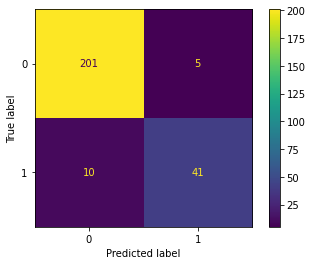

In [301]:
rf.fit(s_64_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, s_64_test, y_test)

In [302]:
# Testing accuracy metrics

predicted_y = rf.predict(s_64_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9416342412451362
Precision:	 0.8913043478260869
Recall:		 0.803921568627451
F1:		 0.845360824742268


In [303]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [304]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP18-17\Slabs\150.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1
0,MP18-17\Slabs\152.png,1
0,MP22-12_19\Slabs\124.png,1


In [305]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\431.png,0
0,MP22\Slabs\81.png,0


#### 32 bins

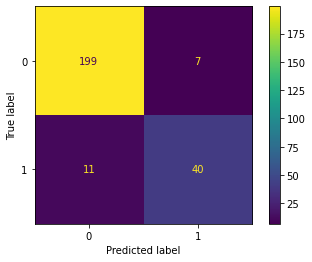

In [306]:
rf.fit(s_32_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, s_32_test, y_test)

In [307]:
# Testing accuracy metrics

predicted_y = rf.predict(s_32_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9299610894941635
Precision:	 0.851063829787234
Recall:		 0.7843137254901961
F1:		 0.8163265306122448


In [308]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [309]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP18-17\Slabs\150.png,1
0,MP22-12_19\Slabs\54.png,1
0,MP22-12_19\Slabs\232.png,1
0,MP22-12_19\Slabs\49.png,1
0,MP22\Slabs\180.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\179.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1
0,MP18-17\Slabs\152.png,1


In [310]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP18-17\Slabs\72.png,0
0,MP22\Slabs\505.png,0
0,MP22\Slabs\11.png,0
0,MP22\Slabs\431.png,0
0,MP22\Slabs\81.png,0


## Best features

### Length and Local Binary Pattern (Default)

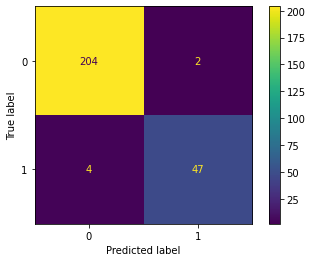

In [311]:
rf.fit(length_lbp_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, length_lbp_test, y_test)

In [312]:
# Testing accuracy metrics

predicted_y = rf.predict(length_lbp_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9766536964980544
Precision:	 0.9591836734693877
Recall:		 0.9215686274509803
F1:		 0.9400000000000001


In [313]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [314]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\454.png,1
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1


In [315]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0


### Feature sets of three best configurations

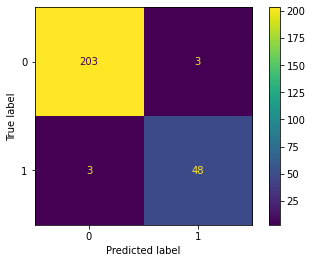

In [316]:
rf.fit(three_train, y_train)
skm.ConfusionMatrixDisplay.from_estimator(rf, three_test, y_test)

In [317]:
# Testing accuracy metrics

predicted_y = rf.predict(three_test)
print("Accuracy:\t", skm.accuracy_score(y_test, predicted_y))
print("Precision:\t", skm.precision_score(y_test, predicted_y))
print("Recall:\t\t", skm.recall_score(y_test, predicted_y))
print("F1:\t\t", skm.f1_score(y_test, predicted_y))

Accuracy:	 0.9766536964980544
Precision:	 0.9411764705882353
Recall:		 0.9411764705882353
F1:		 0.9411764705882353


In [318]:
fn = []
fp = []

for i, (pred, gt) in enumerate(zip(predicted_y, y_test)):
    if pred == 0 and gt == 1:
        fn.append(i)
    elif pred == 1 and gt == 0:
        fp.append(i)
        
rf_fn.update(fn)
rf_fp.update(fp)

In [319]:
print("False Negatives:")
master_test.iloc[fn]

False Negatives:


,File Path,y
0,MP22\Slabs\25.png,1
0,MP22\Slabs\478.png,1
0,MP18-17\Slabs\88.png,1


In [320]:
print("False Positives:")
master_test.iloc[fp]

False Positives:


,File Path,y
0,MP22\Slabs\477.png,0
0,MP22\Slabs\26.png,0
0,MP22\Slabs\505.png,0


# Looking at FP/FN cases

In [321]:
# svc_fn.most_common()

In [322]:
# svc_fp.most_common()

In [323]:
# dt_fn.most_common()

In [324]:
# dt_fp.most_common()

In [325]:
# rf_fn.most_common()

In [326]:
# rf_fp.most_common()

In [327]:
all_fn = svc_fn + dt_fn + rf_fn
all_fp = svc_fp + dt_fp + rf_fp

In [328]:
all_fn.most_common(10)

[(174, 57),
 (210, 56),
 (114, 29),
 (246, 29),
 (67, 28),
 (230, 27),
 (243, 23),
 (172, 20),
 (129, 19),
 (206, 19)]

In [329]:
all_fp.most_common(10)

[(92, 51),
 (126, 38),
 (87, 32),
 (177, 29),
 (202, 19),
 (116, 16),
 (253, 16),
 (244, 15),
 (157, 13),
 (124, 11)]

In [330]:
print("Ten most common false negatives:")
print(master_test.iloc[[fni for fni, _ in all_fn.most_common(10)]])

Ten most common false negatives:
                  File Path  y
0         MP22\Slabs\25.png  1
0        MP22\Slabs\478.png  1
0   MP22-12_19\Slabs\49.png  1
0  MP22-12_19\Slabs\124.png  1
0   MP22-12_19\Slabs\54.png  1
0      MP18-17\Slabs\88.png  1
0     MP18-17\Slabs\152.png  1
0        MP22\Slabs\180.png  1
0        MP22\Slabs\454.png  1
0        MP22\Slabs\450.png  1


In [331]:
print("Ten most common false positives:")
print(master_test.iloc[[fpi for fpi, _ in all_fp.most_common(10)]])

Ten most common false positives:
              File Path  y
0     MP22\Slabs\26.png  0
0    MP22\Slabs\505.png  0
0    MP22\Slabs\477.png  0
0    MP22\Slabs\127.png  0
0    MP22\Slabs\350.png  0
0     MP22\Slabs\37.png  0
0     MP22\Slabs\81.png  0
0    MP22\Slabs\431.png  0
0  MP18-17\Slabs\64.png  0
0  MP18-17\Slabs\72.png  0


In [332]:
length_color_train = pd.concat([length_train.set_index(c_64_train.index), c_64_train], axis=1)
length_color_test = pd.concat([length_test.set_index(c_64_test.index), c_64_test], axis=1)

In [333]:
lbp_color_train = pd.concat([lbp_def_train.set_index(c_64_train.index), c_64_train], axis=1)
lbp_color_test = pd.concat([lbp_def_test.set_index(c_64_test.index), c_64_test], axis=1)

# LinearSVC, Decision Tree, Random Forest

In [334]:
def svc_acc(fea_train, fea_test, gt_train, gt_test, exp='exp name'):
    svc = Pipeline([('scaler', StandardScaler()), ('pipe_svc', LinearSVC(max_iter=50000, random_state=42))])
    svc.fit(fea_train, gt_train)
    
    predicted_y = svc.predict(fea_test)
    print(exp, '\tAccuracy:\t', skm.accuracy_score(gt_test, predicted_y), skm.precision_score(gt_test, predicted_y), skm.recall_score(gt_test, predicted_y), skm.f1_score(gt_test, predicted_y))

In [335]:
svc_acc(length_train, length_test, y_train, y_test, exp='length')
svc_acc(lbp_def_train, lbp_def_test, y_train, y_test, exp='lbp_def')
svc_acc(lbp_def_10_train, lbp_def_10_test, y_train, y_test, exp='lbp_def_10')
svc_acc(lbp_ror_train, lbp_ror_test, y_train, y_test, exp='lbp_ror')
svc_acc(lbp_ror_10_train, lbp_ror_10_test, y_train, y_test, exp='lbp_ror_10')
svc_acc(lbp_uni_train, lbp_uni_test, y_train, y_test, exp='lbp_uni')
svc_acc(lbp_uni_10_train, lbp_uni_10_test, y_train, y_test, exp='lbp_uni_10')
svc_acc(lbp_nri_train, lbp_nri_test, y_train, y_test, exp='lbp_nri')
svc_acc(lbp_nri_10_train, lbp_nri_10_test, y_train, y_test, exp='lbp_nri_10')
svc_acc(c_256_train, c_256_test, y_train, y_test, exp='c_256')
svc_acc(c_128_train, c_128_test, y_train, y_test, exp='c_128')
svc_acc(c_64_train, c_64_test, y_train, y_test, exp='c_64')
svc_acc(c_32_train, c_32_test, y_train, y_test, exp='c_32')
svc_acc(s_256_train, s_256_test, y_train, y_test, exp='s_256')
svc_acc(s_128_train, s_128_test, y_train, y_test, exp='s_128')
svc_acc(s_64_train, s_64_test, y_train, y_test, exp='s_64')
svc_acc(s_32_train, s_32_test, y_train, y_test, exp='s_32')
svc_acc(length_lbp_train, length_lbp_test, y_train, y_test, exp='length_lbp')
svc_acc(length_color_train, length_color_test, y_train, y_test, exp='length_color')
svc_acc(lbp_color_train, lbp_color_test, y_train, y_test, exp='lbp_color')
svc_acc(three_train, three_test, y_train, y_test, exp='three')

length 	Accuracy:	 0.9182879377431906 0.8125 0.7647058823529411 0.787878787878788
lbp_def 	Accuracy:	 0.9766536964980544 0.9591836734693877 0.9215686274509803 0.9400000000000001
lbp_def_10 	Accuracy:	 0.980544747081712 0.96 0.9411764705882353 0.9504950495049505
lbp_ror 	Accuracy:	 0.9299610894941635 0.8666666666666667 0.7647058823529411 0.8125
lbp_ror_10 	Accuracy:	 0.933852140077821 0.9473684210526315 0.7058823529411765 0.8089887640449439
lbp_uni 	Accuracy:	 0.9377431906614786 0.926829268292683 0.7450980392156863 0.8260869565217392
lbp_uni_10 	Accuracy:	 0.9377431906614786 0.926829268292683 0.7450980392156863 0.8260869565217392
lbp_nri 	Accuracy:	 0.980544747081712 0.9423076923076923 0.9607843137254902 0.9514563106796117
lbp_nri_10 	Accuracy:	 0.9455252918287937 0.9111111111111111 0.803921568627451 0.8541666666666666
c_256 	Accuracy:	 0.8832684824902723 0.7142857142857143 0.6862745098039216 0.7000000000000001
c_128 	Accuracy:	 0.8715953307392996 0.7045454545454546 0.6078431372549019 0

In [336]:
def dt_acc(fea_train, fea_test, gt_train, gt_test, exp='exp name'):
    dt = Pipeline([('decision_tree', DecisionTreeClassifier(random_state=42))])
    dt.fit(fea_train, gt_train)
    
    predicted_y = dt.predict(fea_test)
    print(exp, '\tAccuracy:\t', skm.accuracy_score(gt_test, predicted_y), skm.precision_score(gt_test, predicted_y), skm.recall_score(gt_test, predicted_y), skm.f1_score(gt_test, predicted_y))

In [337]:
dt_acc(length_train, length_test, y_train, y_test, exp='length')
dt_acc(lbp_def_train, lbp_def_test, y_train, y_test, exp='lbp_def')
dt_acc(lbp_def_10_train, lbp_def_10_test, y_train, y_test, exp='lbp_def_10')
dt_acc(lbp_ror_train, lbp_ror_test, y_train, y_test, exp='lbp_ror')
dt_acc(lbp_ror_10_train, lbp_ror_10_test, y_train, y_test, exp='lbp_ror_10')
dt_acc(lbp_uni_train, lbp_uni_test, y_train, y_test, exp='lbp_uni')
dt_acc(lbp_uni_10_train, lbp_uni_10_test, y_train, y_test, exp='lbp_uni_10')
dt_acc(lbp_nri_train, lbp_nri_test, y_train, y_test, exp='lbp_nri')
dt_acc(lbp_nri_10_train, lbp_nri_10_test, y_train, y_test, exp='lbp_nri_10')
dt_acc(c_256_train, c_256_test, y_train, y_test, exp='c_256')
dt_acc(c_128_train, c_128_test, y_train, y_test, exp='c_128')
dt_acc(c_64_train, c_64_test, y_train, y_test, exp='c_64')
dt_acc(c_32_train, c_32_test, y_train, y_test, exp='c_32')
dt_acc(s_256_train, s_256_test, y_train, y_test, exp='s_256')
dt_acc(s_128_train, s_128_test, y_train, y_test, exp='s_128')
dt_acc(s_64_train, s_64_test, y_train, y_test, exp='s_64')
dt_acc(s_32_train, s_32_test, y_train, y_test, exp='s_32')
dt_acc(length_lbp_train, length_lbp_test, y_train, y_test, exp='length_lbp')
dt_acc(length_color_train, length_color_test, y_train, y_test, exp='length_color')
dt_acc(lbp_color_train, lbp_color_test, y_train, y_test, exp='lbp_color')
dt_acc(three_train, three_test, y_train, y_test, exp='three')

length 	Accuracy:	 0.8949416342412452 0.75 0.7058823529411765 0.7272727272727272
lbp_def 	Accuracy:	 0.9649805447470817 0.92 0.9019607843137255 0.9108910891089109
lbp_def_10 	Accuracy:	 0.9455252918287937 0.8775510204081632 0.8431372549019608 0.86
lbp_ror 	Accuracy:	 0.9571984435797666 0.8846153846153846 0.9019607843137255 0.8932038834951457
lbp_ror_10 	Accuracy:	 0.914396887159533 0.7735849056603774 0.803921568627451 0.7884615384615384
lbp_uni 	Accuracy:	 0.9571984435797666 0.8703703703703703 0.9215686274509803 0.8952380952380952
lbp_uni_10 	Accuracy:	 0.9571984435797666 0.8703703703703703 0.9215686274509803 0.8952380952380952
lbp_nri 	Accuracy:	 0.953307392996109 0.9148936170212766 0.8431372549019608 0.8775510204081632
lbp_nri_10 	Accuracy:	 0.9494163424124513 0.8518518518518519 0.9019607843137255 0.8761904761904761
c_256 	Accuracy:	 0.8754863813229572 0.6666666666666666 0.7450980392156863 0.7037037037037038
c_128 	Accuracy:	 0.8988326848249028 0.711864406779661 0.8235294117647058 0.

In [338]:
def rf_acc(fea_train, fea_test, gt_train, gt_test, exp='exp name'):
    rf = Pipeline([('random_forest', RandomForestClassifier(random_state=42))])
    rf.fit(fea_train, gt_train)
    
    predicted_y = rf.predict(fea_test)
    print(exp, '\tAccuracy:\t', skm.accuracy_score(gt_test, predicted_y), skm.precision_score(gt_test, predicted_y), skm.recall_score(gt_test, predicted_y), skm.f1_score(gt_test, predicted_y))

In [339]:
rf_acc(length_train, length_test, y_train, y_test, exp='length')
rf_acc(lbp_def_train, lbp_def_test, y_train, y_test, exp='lbp_def')
rf_acc(lbp_def_10_train, lbp_def_10_test, y_train, y_test, exp='lbp_def_10')
rf_acc(lbp_ror_train, lbp_ror_test, y_train, y_test, exp='lbp_ror')
rf_acc(lbp_ror_10_train, lbp_ror_10_test, y_train, y_test, exp='lbp_ror_10')
rf_acc(lbp_uni_train, lbp_uni_test, y_train, y_test, exp='lbp_uni')
rf_acc(lbp_uni_10_train, lbp_uni_10_test, y_train, y_test, exp='lbp_uni_10')
rf_acc(lbp_nri_train, lbp_nri_test, y_train, y_test, exp='lbp_nri')
rf_acc(lbp_nri_10_train, lbp_nri_10_test, y_train, y_test, exp='lbp_nri_10')
rf_acc(c_256_train, c_256_test, y_train, y_test, exp='c_256')
rf_acc(c_128_train, c_128_test, y_train, y_test, exp='c_128')
rf_acc(c_64_train, c_64_test, y_train, y_test, exp='c_64')
rf_acc(c_32_train, c_32_test, y_train, y_test, exp='c_32')
rf_acc(s_256_train, s_256_test, y_train, y_test, exp='s_256')
rf_acc(s_128_train, s_128_test, y_train, y_test, exp='s_128')
rf_acc(s_64_train, s_64_test, y_train, y_test, exp='s_64')
rf_acc(s_32_train, s_32_test, y_train, y_test, exp='s_32')
rf_acc(length_lbp_train, length_lbp_test, y_train, y_test, exp='length_lbp')
rf_acc(length_color_train, length_color_test, y_train, y_test, exp='length_color')
rf_acc(lbp_color_train, lbp_color_test, y_train, y_test, exp='lbp_color')
rf_acc(three_train, three_test, y_train, y_test, exp='three')

length 	Accuracy:	 0.8910505836575876 0.7346938775510204 0.7058823529411765 0.7200000000000001
lbp_def 	Accuracy:	 0.9688715953307393 0.9387755102040817 0.9019607843137255 0.92
lbp_def_10 	Accuracy:	 0.9688715953307393 0.9056603773584906 0.9411764705882353 0.923076923076923
lbp_ror 	Accuracy:	 0.9688715953307393 0.9574468085106383 0.8823529411764706 0.9183673469387754
lbp_ror_10 	Accuracy:	 0.9377431906614786 0.9069767441860465 0.7647058823529411 0.8297872340425532
lbp_uni 	Accuracy:	 0.953307392996109 0.8979591836734694 0.8627450980392157 0.8799999999999999
lbp_uni_10 	Accuracy:	 0.953307392996109 0.8979591836734694 0.8627450980392157 0.8799999999999999
lbp_nri 	Accuracy:	 0.9766536964980544 0.9411764705882353 0.9411764705882353 0.9411764705882353
lbp_nri_10 	Accuracy:	 0.9727626459143969 0.9230769230769231 0.9411764705882353 0.9320388349514563
c_256 	Accuracy:	 0.9377431906614786 0.8888888888888888 0.7843137254901961 0.8333333333333334
c_128 	Accuracy:	 0.9299610894941635 0.851063829

# AdaBoost, MLPClassifier, GradientBoost

In [340]:
from sklearn.ensemble import AdaBoostClassifier

In [341]:
def adaboost(fea_train, fea_test, gt_train, gt_test, exp='exp name'):
    ada = Pipeline([('scaler', StandardScaler()), ('adaboost', AdaBoostClassifier(random_state=42))])
    ada.fit(fea_train, gt_train)
    
    predicted_y = ada.predict(fea_test)
    print(exp, "\tAccuracy:\t", skm.accuracy_score(gt_test, predicted_y), skm.precision_score(gt_test, predicted_y), skm.recall_score(gt_test, predicted_y), skm.f1_score(gt_test, predicted_y))

In [342]:
adaboost(length_train, length_test, y_train, y_test, exp='length')
adaboost(lbp_def_train, lbp_def_test, y_train, y_test, exp='lbp_def')
adaboost(lbp_def_10_train, lbp_def_10_test, y_train, y_test, exp='lbp_def_10')
adaboost(lbp_ror_train, lbp_ror_test, y_train, y_test, exp='lbp_ror')
adaboost(lbp_ror_10_train, lbp_ror_10_test, y_train, y_test, exp='lbp_ror_10')
adaboost(lbp_uni_train, lbp_uni_test, y_train, y_test, exp='lbp_uni')
adaboost(lbp_uni_10_train, lbp_uni_10_test, y_train, y_test, exp='lbp_uni_10')
adaboost(lbp_nri_train, lbp_nri_test, y_train, y_test, exp='lbp_nri')
adaboost(lbp_nri_10_train, lbp_nri_10_test, y_train, y_test, exp='lbp_nri_10')
adaboost(c_256_train, c_256_test, y_train, y_test, exp='c_256')
adaboost(c_128_train, c_128_test, y_train, y_test, exp='c_128')
adaboost(c_64_train, c_64_test, y_train, y_test, exp='c_64')
adaboost(c_32_train, c_32_test, y_train, y_test, exp='c_32')
adaboost(s_256_train, s_256_test, y_train, y_test, exp='s_256')
adaboost(s_128_train, s_128_test, y_train, y_test, exp='s_128')
adaboost(s_64_train, s_64_test, y_train, y_test, exp='s_64')
adaboost(s_32_train, s_32_test, y_train, y_test, exp='s_32')
adaboost(length_lbp_train, length_lbp_test, y_train, y_test, exp='length_lbp')
adaboost(length_color_train, length_color_test, y_train, y_test, exp='length_color')
adaboost(lbp_color_train, lbp_color_test, y_train, y_test, exp='lbp_color')
adaboost(three_train, three_test, y_train, y_test, exp='three')

length 	Accuracy:	 0.8988326848249028 0.7659574468085106 0.7058823529411765 0.7346938775510204
lbp_def 	Accuracy:	 0.9766536964980544 0.9591836734693877 0.9215686274509803 0.9400000000000001
lbp_def_10 	Accuracy:	 0.9727626459143969 0.94 0.9215686274509803 0.9306930693069307
lbp_ror 	Accuracy:	 0.9688715953307393 0.9574468085106383 0.8823529411764706 0.9183673469387754
lbp_ror_10 	Accuracy:	 0.933852140077821 0.8695652173913043 0.7843137254901961 0.8247422680412372
lbp_uni 	Accuracy:	 0.9571984435797666 0.9166666666666666 0.8627450980392157 0.888888888888889
lbp_uni_10 	Accuracy:	 0.9571984435797666 0.9166666666666666 0.8627450980392157 0.888888888888889
lbp_nri 	Accuracy:	 0.9727626459143969 0.9230769230769231 0.9411764705882353 0.9320388349514563
lbp_nri_10 	Accuracy:	 0.953307392996109 0.8679245283018868 0.9019607843137255 0.8846153846153846
c_256 	Accuracy:	 0.9182879377431906 0.8260869565217391 0.7450980392156863 0.7835051546391751
c_128 	Accuracy:	 0.9299610894941635 0.8510638297

In [343]:
from sklearn.neural_network import MLPClassifier

In [344]:
def mlpclassifier(fea_train, fea_test, gt_train, gt_test, exp='exp name'):
    mlp = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(max_iter=1000, random_state=42))])
    mlp.fit(fea_train, gt_train)
    
    predicted_y = mlp.predict(fea_test)
    print(exp, "\tAccuracy:\t", skm.accuracy_score(gt_test, predicted_y))
    
def mlpclassifier2(fea_train, fea_test, gt_train, gt_test, exp='exp name'):
    mlp = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42))])
    mlp.fit(fea_train, gt_train)
    
    predicted_y = mlp.predict(fea_test)
    print(exp, "\tAccuracy:\t", skm.accuracy_score(gt_test, predicted_y), skm.precision_score(gt_test, predicted_y), skm.recall_score(gt_test, predicted_y), skm.f1_score(gt_test, predicted_y))

In [345]:
mlpclassifier(length_train, length_test, y_train, y_test, exp='length')
mlpclassifier(lbp_def_train, lbp_def_test, y_train, y_test, exp='lbp_def')
mlpclassifier(lbp_def_10_train, lbp_def_10_test, y_train, y_test, exp='lbp_def_10')
mlpclassifier(lbp_ror_train, lbp_ror_test, y_train, y_test, exp='lbp_ror')
mlpclassifier(lbp_ror_10_train, lbp_ror_10_test, y_train, y_test, exp='lbp_ror_10')
mlpclassifier(lbp_uni_train, lbp_uni_test, y_train, y_test, exp='lbp_uni')
mlpclassifier(lbp_uni_10_train, lbp_uni_10_test, y_train, y_test, exp='lbp_uni_10')
mlpclassifier(lbp_nri_train, lbp_nri_test, y_train, y_test, exp='lbp_nri')
mlpclassifier(lbp_nri_10_train, lbp_nri_10_test, y_train, y_test, exp='lbp_nri_10')
mlpclassifier(c_256_train, c_256_test, y_train, y_test, exp='c_256')
mlpclassifier(c_128_train, c_128_test, y_train, y_test, exp='c_128')
mlpclassifier(c_64_train, c_64_test, y_train, y_test, exp='c_64')
mlpclassifier(c_32_train, c_32_test, y_train, y_test, exp='c_32')
mlpclassifier(s_256_train, s_256_test, y_train, y_test, exp='s_256')
mlpclassifier(s_128_train, s_128_test, y_train, y_test, exp='s_128')
mlpclassifier(s_64_train, s_64_test, y_train, y_test, exp='s_64')
mlpclassifier(s_32_train, s_32_test, y_train, y_test, exp='s_32')
mlpclassifier(length_lbp_train, length_lbp_test, y_train, y_test, exp='length_lbp')
mlpclassifier(length_color_train, length_color_test, y_train, y_test, exp='length_color')
mlpclassifier(lbp_color_train, lbp_color_test, y_train, y_test, exp='lbp_color')
mlpclassifier(three_train, three_test, y_train, y_test, exp='three')

length 	Accuracy:	 0.9066147859922179
lbp_def 	Accuracy:	 0.9494163424124513
lbp_def_10 	Accuracy:	 0.9727626459143969
lbp_ror 	Accuracy:	 0.953307392996109
lbp_ror_10 	Accuracy:	 0.9494163424124513
lbp_uni 	Accuracy:	 0.9688715953307393
lbp_uni_10 	Accuracy:	 0.9688715953307393
lbp_nri 	Accuracy:	 0.9844357976653697
lbp_nri_10 	Accuracy:	 0.9688715953307393
c_256 	Accuracy:	 0.933852140077821
c_128 	Accuracy:	 0.9182879377431906
c_64 	Accuracy:	 0.9260700389105059
c_32 	Accuracy:	 0.9377431906614786
s_256 	Accuracy:	 0.933852140077821
s_128 	Accuracy:	 0.9221789883268483
s_64 	Accuracy:	 0.9299610894941635
s_32 	Accuracy:	 0.9377431906614786
length_lbp 	Accuracy:	 0.953307392996109
length_color 	Accuracy:	 0.9494163424124513
lbp_color 	Accuracy:	 0.9571984435797666
three 	Accuracy:	 0.9610894941634242


In [346]:
mlpclassifier2(length_train, length_test, y_train, y_test, exp='length')
mlpclassifier2(lbp_def_train, lbp_def_test, y_train, y_test, exp='lbp_def')
mlpclassifier2(lbp_def_10_train, lbp_def_10_test, y_train, y_test, exp='lbp_def_10')
mlpclassifier2(lbp_ror_train, lbp_ror_test, y_train, y_test, exp='lbp_ror')
mlpclassifier2(lbp_ror_10_train, lbp_ror_10_test, y_train, y_test, exp='lbp_ror_10')
mlpclassifier2(lbp_uni_train, lbp_uni_test, y_train, y_test, exp='lbp_uni')
mlpclassifier2(lbp_uni_10_train, lbp_uni_10_test, y_train, y_test, exp='lbp_uni_10')
mlpclassifier2(lbp_nri_train, lbp_nri_test, y_train, y_test, exp='lbp_nri')
mlpclassifier2(lbp_nri_10_train, lbp_nri_10_test, y_train, y_test, exp='lbp_nri_10')
mlpclassifier2(c_256_train, c_256_test, y_train, y_test, exp='c_256')
mlpclassifier2(c_128_train, c_128_test, y_train, y_test, exp='c_128')
mlpclassifier2(c_64_train, c_64_test, y_train, y_test, exp='c_64')
mlpclassifier2(c_32_train, c_32_test, y_train, y_test, exp='c_32')
mlpclassifier2(s_256_train, s_256_test, y_train, y_test, exp='s_256')
mlpclassifier2(s_128_train, s_128_test, y_train, y_test, exp='s_128')
mlpclassifier2(s_64_train, s_64_test, y_train, y_test, exp='s_64')
mlpclassifier2(s_32_train, s_32_test, y_train, y_test, exp='s_32')
mlpclassifier2(length_lbp_train, length_lbp_test, y_train, y_test, exp='length_lbp')
mlpclassifier2(length_color_train, length_color_test, y_train, y_test, exp='length_color')
mlpclassifier2(lbp_color_train, lbp_color_test, y_train, y_test, exp='lbp_color')
mlpclassifier2(three_train, three_test, y_train, y_test, exp='three')

length 	Accuracy:	 0.9221789883268483 0.7719298245614035 0.8627450980392157 0.8148148148148149
lbp_def 	Accuracy:	 0.953307392996109 0.9534883720930233 0.803921568627451 0.8723404255319148
lbp_def_10 	Accuracy:	 0.9688715953307393 0.9215686274509803 0.9215686274509803 0.9215686274509803
lbp_ror 	Accuracy:	 0.9610894941634242 0.9555555555555556 0.8431372549019608 0.8958333333333333
lbp_ror_10 	Accuracy:	 0.9494163424124513 0.9130434782608695 0.8235294117647058 0.865979381443299
lbp_uni 	Accuracy:	 0.953307392996109 0.8979591836734694 0.8627450980392157 0.8799999999999999
lbp_uni_10 	Accuracy:	 0.953307392996109 0.8979591836734694 0.8627450980392157 0.8799999999999999
lbp_nri 	Accuracy:	 0.9766536964980544 0.9591836734693877 0.9215686274509803 0.9400000000000001
lbp_nri_10 	Accuracy:	 0.9727626459143969 0.9230769230769231 0.9411764705882353 0.9320388349514563
c_256 	Accuracy:	 0.9260700389105059 0.8636363636363636 0.7450980392156863 0.8
c_128 	Accuracy:	 0.9182879377431906 0.840909090909

In [347]:
from sklearn.ensemble import GradientBoostingClassifier

In [348]:
def gbdtclassifier(fea_train, fea_test, gt_train, gt_test, exp='exp name'):
    gbdt = Pipeline([('scaler', StandardScaler()), ('gbdt', GradientBoostingClassifier(random_state=42))])
    gbdt.fit(fea_train, gt_train)
    
    predicted_y = gbdt.predict(fea_test)
    print(exp, "\tAccuracy:\t", skm.accuracy_score(gt_test, predicted_y), skm.precision_score(gt_test, predicted_y), skm.recall_score(gt_test, predicted_y), skm.f1_score(gt_test, predicted_y))

In [349]:
gbdtclassifier(length_train, length_test, y_train, y_test, exp='length')
gbdtclassifier(lbp_def_train, lbp_def_test, y_train, y_test, exp='lbp_def')
gbdtclassifier(lbp_def_10_train, lbp_def_10_test, y_train, y_test, exp='lbp_def_10')
gbdtclassifier(lbp_ror_train, lbp_ror_test, y_train, y_test, exp='lbp_ror')
gbdtclassifier(lbp_ror_10_train, lbp_ror_10_test, y_train, y_test, exp='lbp_ror_10')
gbdtclassifier(lbp_uni_train, lbp_uni_test, y_train, y_test, exp='lbp_uni')
gbdtclassifier(lbp_uni_10_train, lbp_uni_10_test, y_train, y_test, exp='lbp_uni_10')
gbdtclassifier(lbp_nri_train, lbp_nri_test, y_train, y_test, exp='lbp_nri')
gbdtclassifier(lbp_nri_10_train, lbp_nri_10_test, y_train, y_test, exp='lbp_nri_10')
gbdtclassifier(c_256_train, c_256_test, y_train, y_test, exp='c_256')
gbdtclassifier(c_128_train, c_128_test, y_train, y_test, exp='c_128')
gbdtclassifier(c_64_train, c_64_test, y_train, y_test, exp='c_64')
gbdtclassifier(c_32_train, c_32_test, y_train, y_test, exp='c_32')
gbdtclassifier(s_256_train, s_256_test, y_train, y_test, exp='s_256')
gbdtclassifier(s_128_train, s_128_test, y_train, y_test, exp='s_128')
gbdtclassifier(s_64_train, s_64_test, y_train, y_test, exp='s_64')
gbdtclassifier(s_32_train, s_32_test, y_train, y_test, exp='s_32')
gbdtclassifier(length_lbp_train, length_lbp_test, y_train, y_test, exp='length_lbp')
gbdtclassifier(length_color_train, length_color_test, y_train, y_test, exp='length_color')
gbdtclassifier(lbp_color_train, lbp_color_test, y_train, y_test, exp='lbp_color')
gbdtclassifier(three_train, three_test, y_train, y_test, exp='three')

length 	Accuracy:	 0.8871595330739299 0.7291666666666666 0.6862745098039216 0.7070707070707071
lbp_def 	Accuracy:	 0.9727626459143969 0.94 0.9215686274509803 0.9306930693069307
lbp_def_10 	Accuracy:	 0.9688715953307393 0.9215686274509803 0.9215686274509803 0.9215686274509803
lbp_ror 	Accuracy:	 0.9727626459143969 0.94 0.9215686274509803 0.9306930693069307
lbp_ror_10 	Accuracy:	 0.9377431906614786 0.8888888888888888 0.7843137254901961 0.8333333333333334
lbp_uni 	Accuracy:	 0.9610894941634242 0.9361702127659575 0.8627450980392157 0.8979591836734694
lbp_uni_10 	Accuracy:	 0.9610894941634242 0.9361702127659575 0.8627450980392157 0.8979591836734694
lbp_nri 	Accuracy:	 0.9688715953307393 0.9056603773584906 0.9411764705882353 0.923076923076923
lbp_nri_10 	Accuracy:	 0.9649805447470817 0.9038461538461539 0.9215686274509803 0.9126213592233009
c_256 	Accuracy:	 0.933852140077821 0.8695652173913043 0.7843137254901961 0.8247422680412372
c_128 	Accuracy:	 0.9377431906614786 0.8723404255319149 0.803